**IMPORTING ALL NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl
from textblob import TextBlob
from wordcloud import WordCloud
import random
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

 **CONVERTING THE CSV FILE OF DATASET(IPL_DATASET_2008_2022) INTO DATAFRAME(df)**

In [2]:
df = pd.read_csv(r'C:\Users\golut\OneDrive\Desktop\Datasets\IPL_DATASET_2008_2022.csv')

**OVERVIEW OF THE DATAFRAME(df)**

In [3]:
df

,Id,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,WinningStreak
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,3
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,4
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,20-04-2008,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,933
946,335985,Mumbai,20-04-2008,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,934
947,335984,Delhi,19-04-2008,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,935
948,335983,Chandigarh,19-04-2008,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,936


In [4]:
df.head(10)

,Id,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,WinningStreak
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,3
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,4
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,5
5,1304115,Mumbai,21-05-2022,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma,6
6,1304114,Mumbai,20-05-2022,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,N,Rajasthan Royals,Wickets,5,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan,7
7,1304113,Mumbai,19-05-2022,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer,8
8,1304112,Navi Mumbai,18-05-2022,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde,9
9,1304111,Mumbai,17-05-2022,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit,10


In [5]:
df.tail(10)

,Id,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,WinningStreak
940,335991,Chandigarh,25-04-2008,2007/08,10,Kings XI Punjab,Mumbai Indians,"Punjab Cricket Association Stadium, Mohali",Mumbai Indians,field,N,Kings XI Punjab,Runs,66,KC Sangakkara,"['K Goel', 'IK Pathan', 'KC Sangakkara', 'Yuvr...","['L Ronchi', 'ST Jayasuriya', 'RV Uthappa', 'D...",Aleem Dar,AM Saheba,928
941,335990,Hyderabad,24-04-2008,2007/08,9,Deccan Chargers,Rajasthan Royals,"Rajiv Gandhi International Stadium, Uppal",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,3,YK Pathan,"['AC Gilchrist', 'VVS Laxman', 'Shahid Afridi'...","['Kamran Akmal', 'GC Smith', 'YK Pathan', 'SR ...",Asad Rauf,MR Benson,929
942,335989,Chennai,23-04-2008,2007/08,8,Chennai Super Kings,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,field,N,Chennai Super Kings,Runs,6,ML Hayden,"['PA Patel', 'ML Hayden', 'MEK Hussey', 'SK Ra...","['L Ronchi', 'ST Jayasuriya', 'RV Uthappa', 'S...",DJ Harper,GA Pratapkumar,930
943,335988,Hyderabad,22-04-2008,2007/08,7,Deccan Chargers,Delhi Daredevils,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,bat,N,Delhi Daredevils,Wickets,9,V Sehwag,"['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...","['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...",IL Howell,AM Saheba,931
944,335987,Jaipur,21-04-2008,2007/08,6,Rajasthan Royals,Kings XI Punjab,Sawai Mansingh Stadium,Kings XI Punjab,bat,N,Rajasthan Royals,Wickets,6,SR Watson,"['M Kaif', 'Kamran Akmal', 'YK Pathan', 'SR Wa...","['K Goel', 'JR Hopes', 'KC Sangakkara', 'DPMD ...",Aleem Dar,RB Tiffin,932
945,335986,Kolkata,20-04-2008,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,933
946,335985,Mumbai,20-04-2008,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,934
947,335984,Delhi,19-04-2008,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,935
948,335983,Chandigarh,19-04-2008,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,936
949,335982,Bangalore,18-04-2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,937


In [6]:
df.shape

(950, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               950 non-null    int64 
 1   City             950 non-null    object
 2   Date             950 non-null    object
 3   Season           950 non-null    object
 4   MatchNumber      950 non-null    object
 5   Team1            950 non-null    object
 6   Team2            950 non-null    object
 7   Venue            950 non-null    object
 8   TossWinner       950 non-null    object
 9   TossDecision     950 non-null    object
 10  SuperOver        950 non-null    object
 11  WinningTeam      950 non-null    object
 12  WonBy            950 non-null    object
 13  Margin           950 non-null    int64 
 14  Player_of_Match  950 non-null    object
 15  Team1Players     950 non-null    object
 16  Team2Players     950 non-null    object
 17  Umpire1          950 non-null    ob

In [8]:
df.columns

Index(['Id', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'Player_of_Match', 'Team1Players', 'Team2Players',
       'Umpire1', 'Umpire2', 'WinningStreak'],
      dtype='object')

In [9]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
df.isnull()

,Id,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,WinningStreak
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Id                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
WinningStreak      0
dtype: int64

**NOW DATAFRAME IS LOOKING GOOD SO I AM GOING TO VISUALYSE IT**

### **1. PLOTTING WINNING STREAK FOR EACH TEAM**

In [12]:
# Creating a new column 'WinningStreak' to track the winning streak for each team
df['WinningStreak'] = df['WinningTeam'].ne(df['WinningTeam'].shift()).cumsum()

In [13]:
# Grouping the data by 'WinningTeam' and 'WinningStreak' and counting the occurrences
winning_streaks = df.groupby(['WinningTeam', 'WinningStreak']).size().reset_index(name='Count')

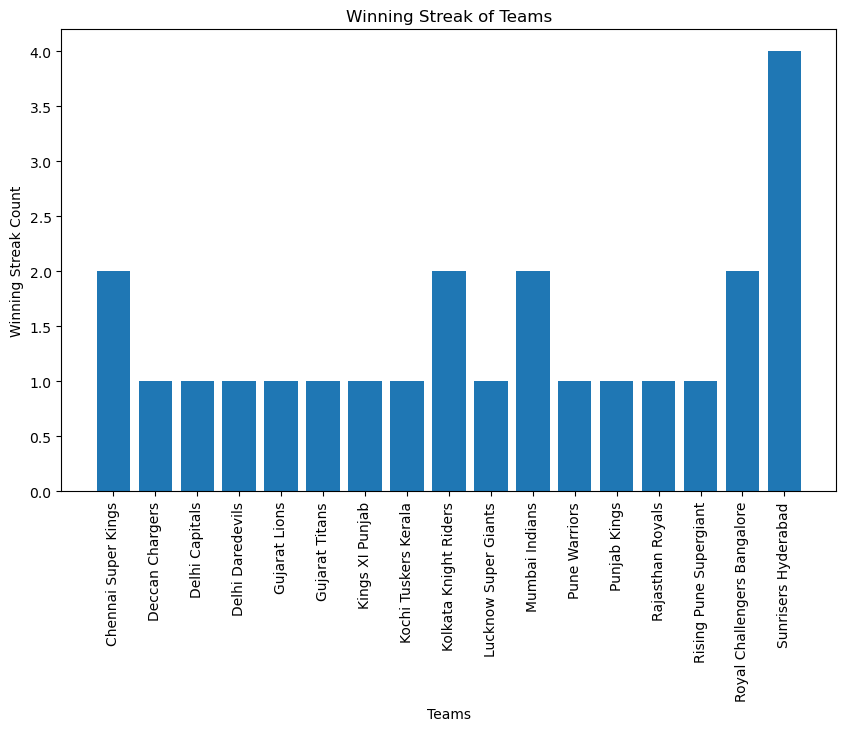

In [14]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(winning_streaks['WinningTeam'], winning_streaks['Count'])
plt.xlabel('Teams')
plt.ylabel('Winning Streak Count')
plt.title('Winning Streak of Teams')
plt.xticks(rotation=90)
plt.show()

 ### **2. PLOTTING MAXIMUM NUMBER OF MATCHES WON MY EACH TEAM**

In [15]:
# Finding the team with the highest winning streak
team_with_highest_streak = winning_streaks.loc[winning_streaks['Count'].idxmax(), 'WinningTeam']

In [16]:
# Printing the conclusion
print("The team with the highest winning streak is:", team_with_highest_streak)

The team with the highest winning streak is: Sunrisers Hyderabad


In [17]:
team_wins = df['WinningTeam'].value_counts().reset_index()
team_wins.columns = ['Team', 'TotalMatchesWon']
team_wins = team_wins.sort_values('TotalMatchesWon', ascending=False)

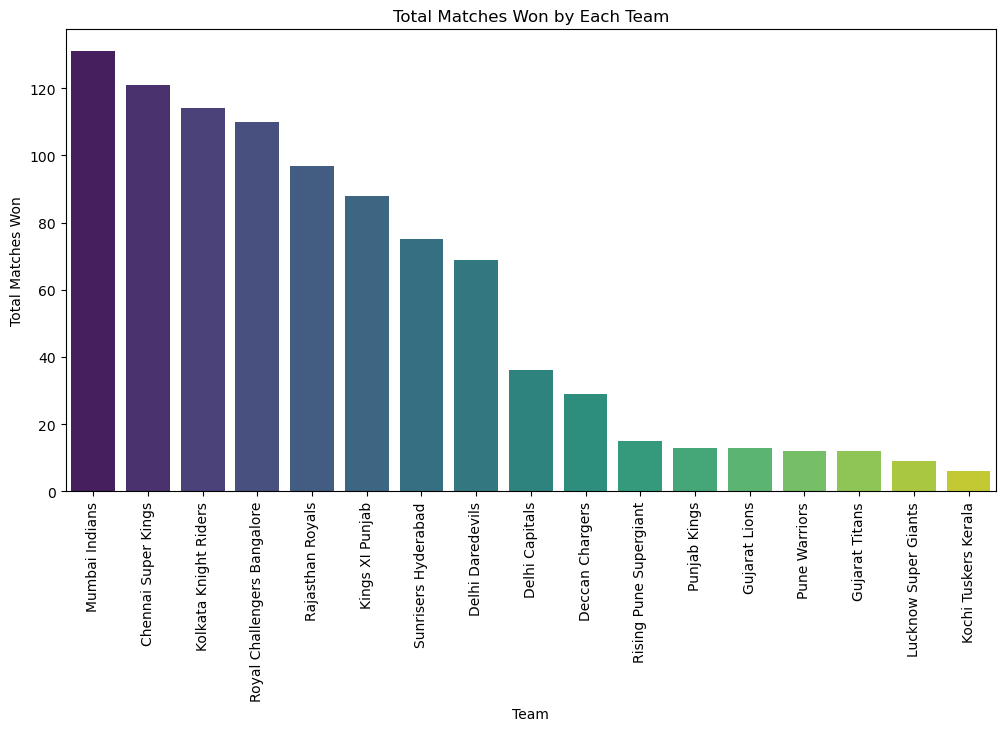

In [18]:
# plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='TotalMatchesWon', data=team_wins, palette='viridis')
plt.xlabel('Team')
plt.ylabel('Total Matches Won')
plt.title('Total Matches Won by Each Team')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Conclusion for the team that won the maximum number of matches
max_matches_won = team_wins.loc[team_wins['TotalMatchesWon'].idxmax(), 'Team']
print("1. The team that won the maximum number of matches is:", max_matches_won)

1. The team that won the maximum number of matches is: Mumbai Indians


In [20]:
# Conclusion for the team that won the minimum number of matches
min_matches_won = team_wins.loc[team_wins['TotalMatchesWon'].idxmin(), 'Team']
print("2. The team that won the minimum number of matches is:", min_matches_won)

2. The team that won the minimum number of matches is: Kochi Tuskers Kerala


### **3. PLOTTING THE PERFORMANCE OF TEAM AGAINST A SPECIFIC OPPONENT**

In [21]:
# Calculating the win-loss record for each team against specific opponents
team_performance = df.groupby(['Team1', 'Team2', 'WinningTeam']).size().reset_index(name='Matches')
team_performance['Wins'] = team_performance.apply(lambda row: row['Matches'] if row['WinningTeam'] == row['Team1'] else 0, axis=1)
team_performance['Losses'] = team_performance.apply(lambda row: row['Matches'] if row['WinningTeam'] != row['Team1'] else 0, axis=1)

In [22]:
# Aggregating the win count for each team against an opponent
performance_matrix = team_performance.groupby(['Team1', 'Team2'])['Wins'].sum().unstack()

In [23]:
# Replace non-finite values with zeros
performance_matrix = performance_matrix.replace(np.nan, 0).replace(np.inf, 0)

In [24]:
# Converting the performance matrix to integers
performance_matrix = performance_matrix.astype(int)

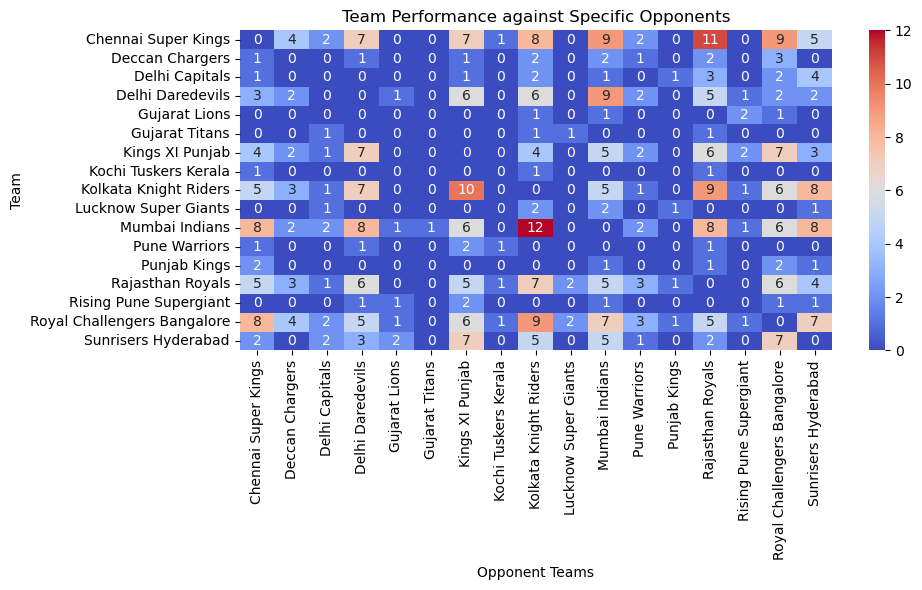

In [25]:
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_matrix, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('Opponent Teams')
plt.ylabel('Team')
plt.title('Team Performance against Specific Opponents')
plt.tight_layout()
plt.show()

### **4. PLOTTING THE GRAPH WHICH SHOWS THAT WHAT IS MAXIMUM NUMBER OF MATCHES A TEAM WIN IN A PARTICULAR VENUE** 

In [26]:
# Grouping the data by venue and winning team and count the occurrences
venue_winning_counts = df.groupby(['Venue', 'WinningTeam']).size().reset_index(name='Count')

In [27]:
# Finding the team with the maximum count in each venue
max_winning_teams = venue_winning_counts.groupby('Venue')['Count'].idxmax()
best_teams_in_venues = venue_winning_counts.loc[max_winning_teams]

In [28]:
# Extracting only the Stadium_Name from the Venue column
best_teams_in_venues['Stadium_Name'] = best_teams_in_venues['Venue'].apply(lambda x: x.split(',')[0])

In [29]:
# Assigning a different color to each team
team_colors = plt.cm.tab20.colors[:len(best_teams_in_venues)]

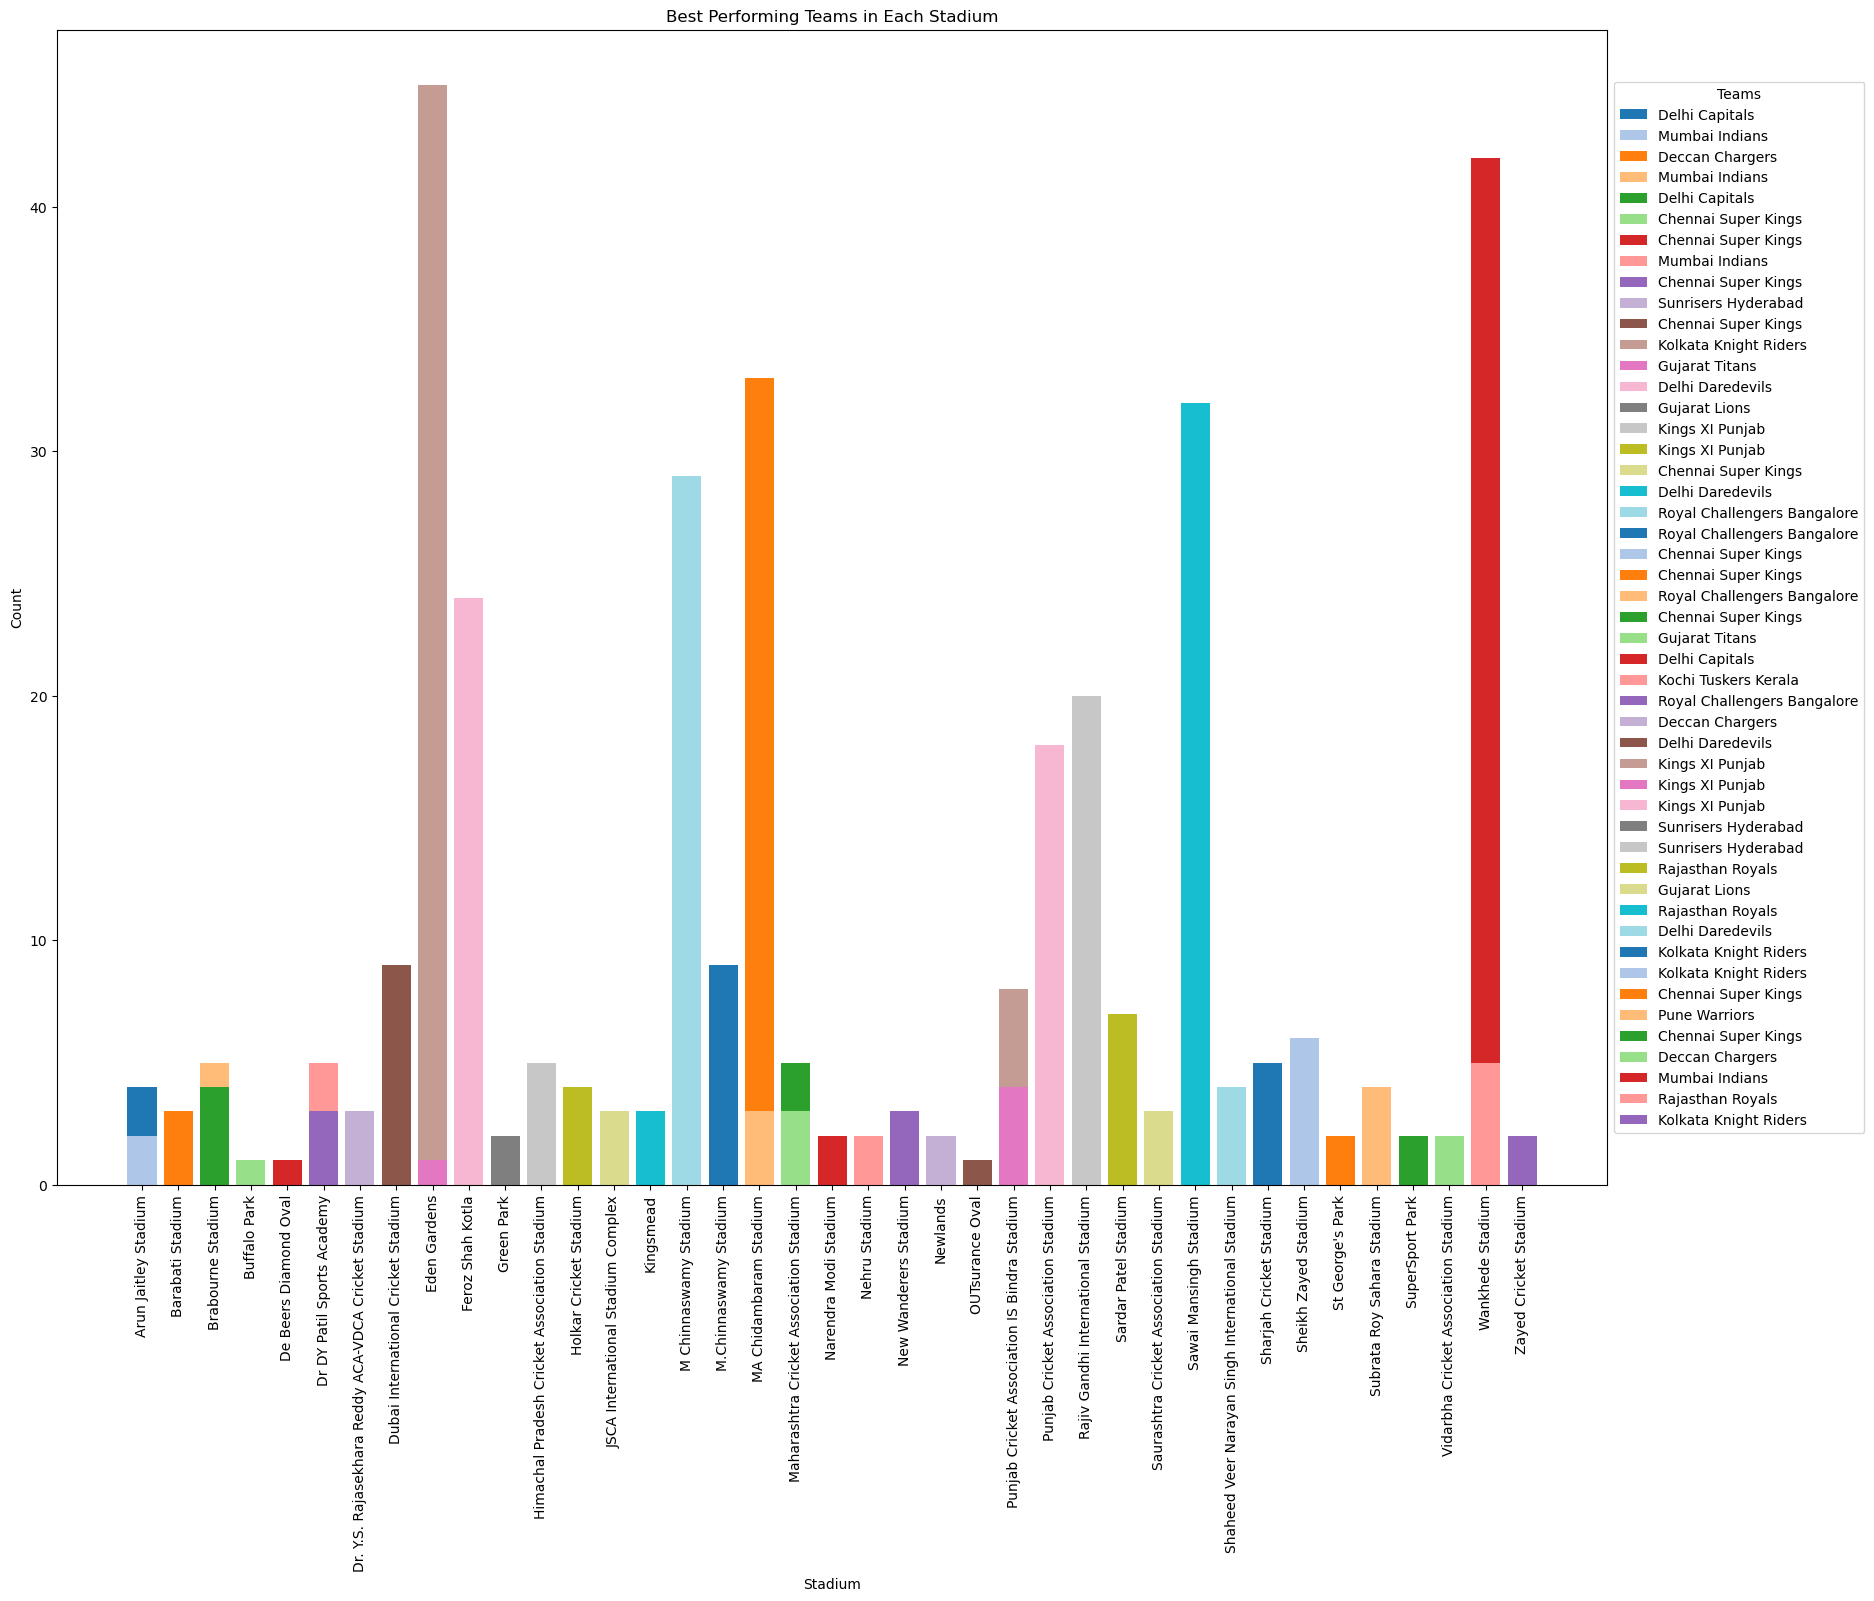

In [30]:
# Plotting the data
plt.figure(figsize=(20, 15))
bars = plt.bar(best_teams_in_venues['Stadium_Name'], best_teams_in_venues['Count'], color=team_colors)
team_names = best_teams_in_venues['WinningTeam'].tolist()
plt.legend(bars, team_names, title='Teams', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Best Performing Teams in Each Stadium')
plt.xlabel('Stadium')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Printing conclusion as a seprate dataframe
conclusion_df = best_teams_in_venues[['Stadium_Name', 'WinningTeam', 'Count']].copy()
conclusion_df.columns = ['Stadium', 'Best Performing Team', 'Count']
conclusion_df.reset_index(drop=True, inplace=True)
conclusion_df

,Stadium,Best Performing Team,Count
0,Arun Jaitley Stadium,Delhi Capitals,4
1,Arun Jaitley Stadium,Mumbai Indians,2
2,Barabati Stadium,Deccan Chargers,3
3,Brabourne Stadium,Mumbai Indians,5
4,Brabourne Stadium,Delhi Capitals,4
5,Buffalo Park,Chennai Super Kings,1
6,De Beers Diamond Oval,Chennai Super Kings,1
7,Dr DY Patil Sports Academy,Mumbai Indians,5
8,Dr DY Patil Sports Academy,Chennai Super Kings,3
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,3


### **5. PLOTTING THE WIN PERCENTAGE OF EACH TEAM IN A PARTICULAR STADUIM**

In [32]:
# Grouping the data by venue and winning team and count the occurrences
venue_winning_counts = df.groupby(['Venue', 'WinningTeam']).size().reset_index(name='Count')

In [33]:
# Calculating the total matches played in each venue
venue_total_matches = venue_winning_counts.groupby('Venue')['Count'].sum().reset_index(name='TotalMatches')

In [34]:
# Merging the winning counts and total matches dataframes
venue_stats = pd.merge(venue_winning_counts, venue_total_matches, on='Venue')

In [35]:
# Calculating the winning percentage
venue_stats['WinningPercentage'] = (venue_stats['Count'] / venue_stats['TotalMatches']) * 100

In [36]:
# Finding the team with the maximum winning percentage in each venue
max_winning_teams = venue_stats.groupby('Venue')['WinningPercentage'].idxmax()
best_teams_in_venues = venue_stats.loc[max_winning_teams]

In [37]:
# Extracting only the Stadium_Name from the Venue column
best_teams_in_venues['Stadium_Name'] = best_teams_in_venues['Venue'].apply(lambda x: x.split(',')[0])

In [38]:
# Assigning a different color to each team
team_colors = plt.cm.tab20.colors[:len(best_teams_in_venues)]

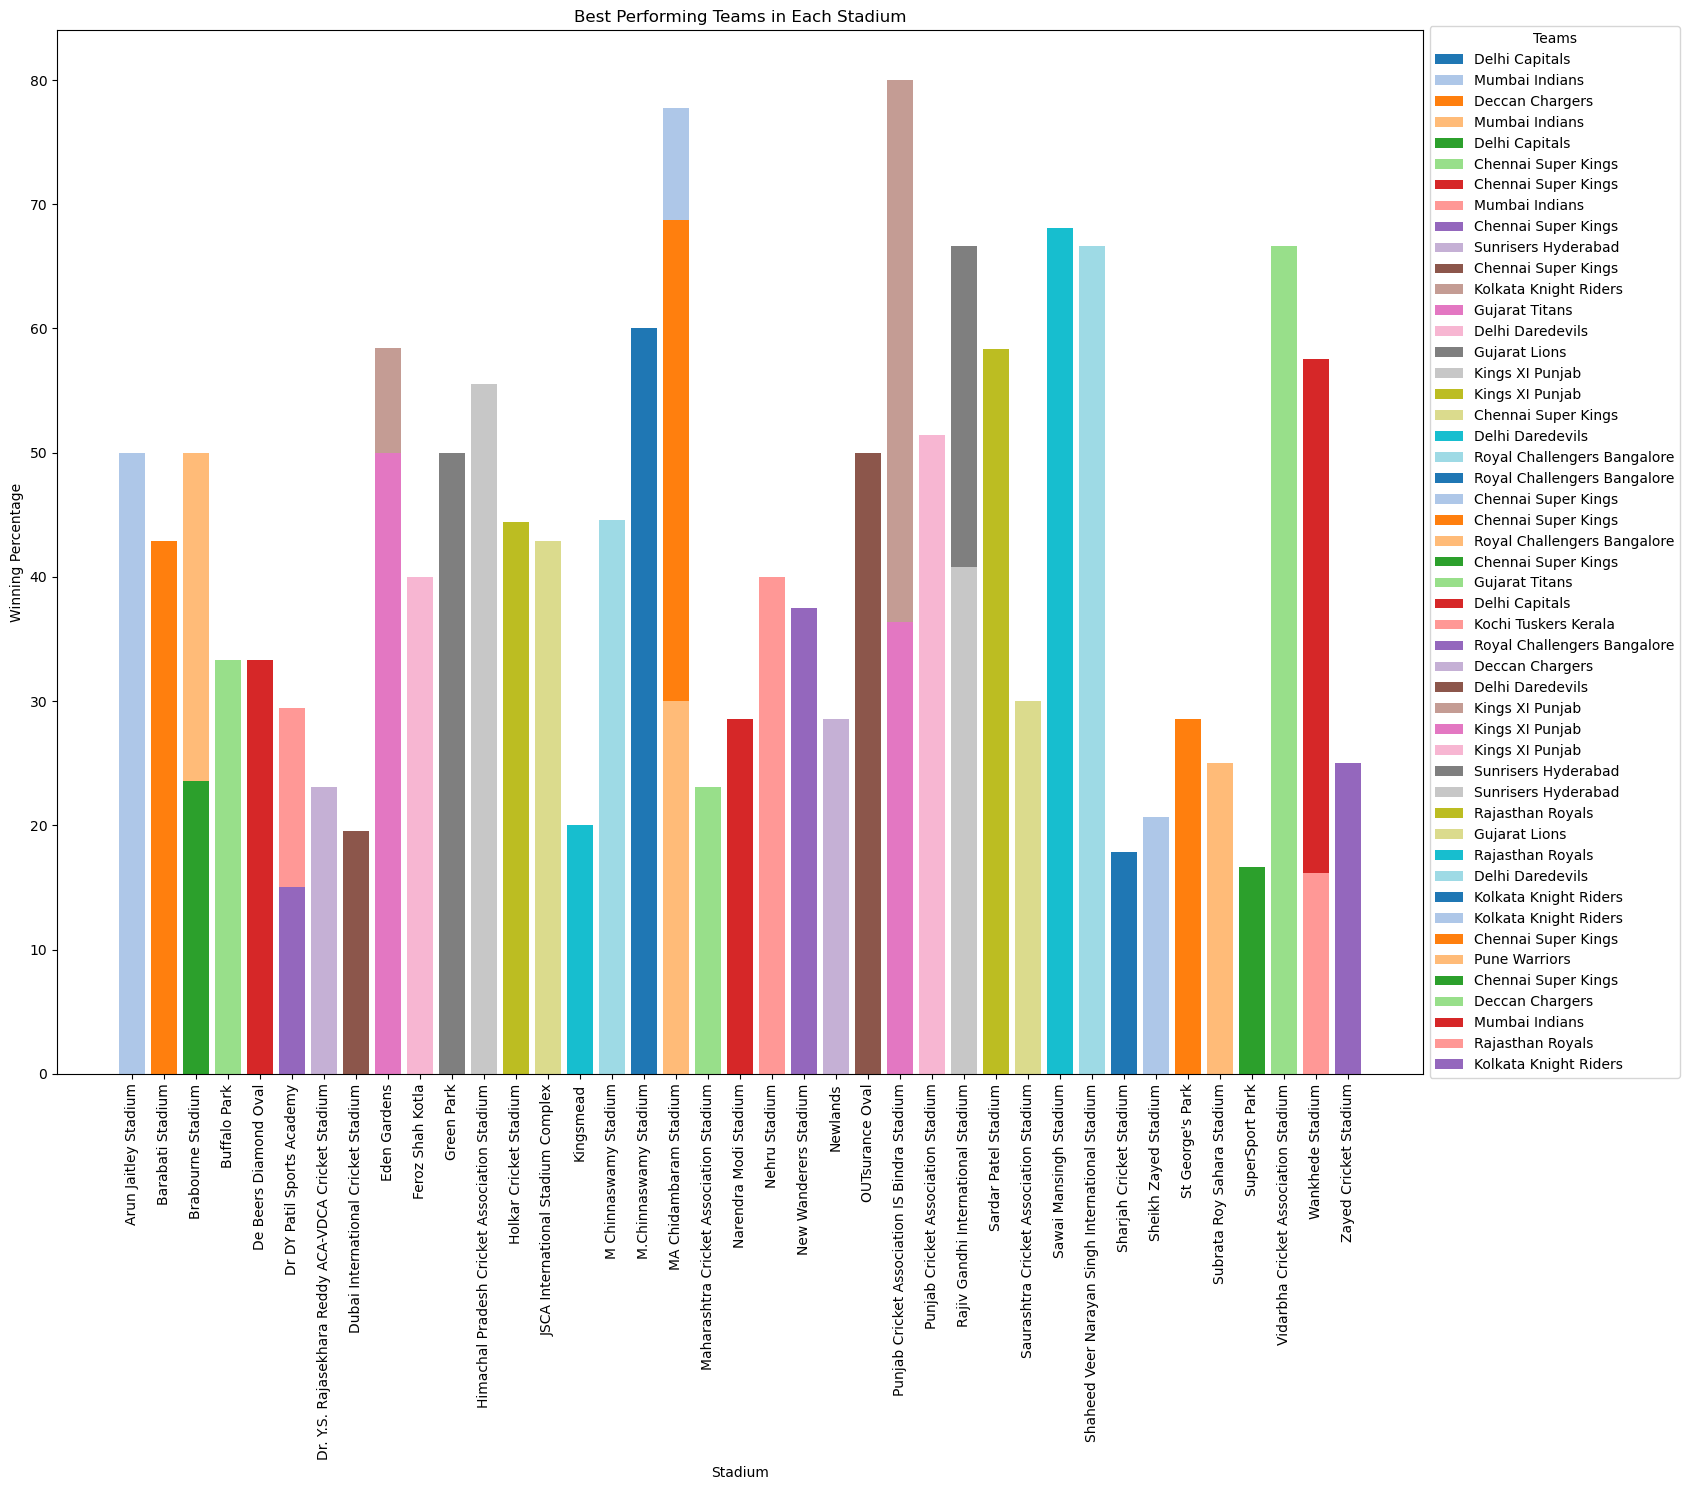

In [39]:
# Plotting the data
fig, ax = plt.subplots(figsize=(20, 15))
bars = ax.bar(best_teams_in_venues['Stadium_Name'], best_teams_in_venues['WinningPercentage'], color=team_colors)
team_names = best_teams_in_venues['WinningTeam'].tolist()
legend = ax.legend(bars, team_names, title='Teams', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Best Performing Teams in Each Stadium')
plt.xlabel('Stadium')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [40]:
# Printing the conclusion
conclusion_df = best_teams_in_venues[['Stadium_Name', 'WinningTeam', 'WinningPercentage']].copy()
conclusion_df.columns = ['Stadium', 'Best Performing Team', 'Winning Percentage']
conclusion_df.reset_index(drop=True, inplace=True)
conclusion_df

,Stadium,Best Performing Team,Winning Percentage
0,Arun Jaitley Stadium,Delhi Capitals,28.571429
1,Arun Jaitley Stadium,Mumbai Indians,50.000000
2,Barabati Stadium,Deccan Chargers,42.857143
3,Brabourne Stadium,Mumbai Indians,50.000000
4,Brabourne Stadium,Delhi Capitals,23.529412
5,Buffalo Park,Chennai Super Kings,33.333333
6,De Beers Diamond Oval,Chennai Super Kings,33.333333
7,Dr DY Patil Sports Academy,Mumbai Indians,29.411765
8,Dr DY Patil Sports Academy,Chennai Super Kings,15.000000
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,23.076923


### **6. PRINTING THE WIN-LOOSE RATIO FOR EACH TEAM**

In [41]:
team_wins = df['WinningTeam'].value_counts()
team_matches = df['Team1'].value_counts() + df['Team2'].value_counts()
win_loss_ratio = team_wins / team_matches

In [42]:
num_teams = len(win_loss_ratio)
color_map = plt.get_cmap('tab20')
colors = color_map(np.linspace(0, 1, num_teams))

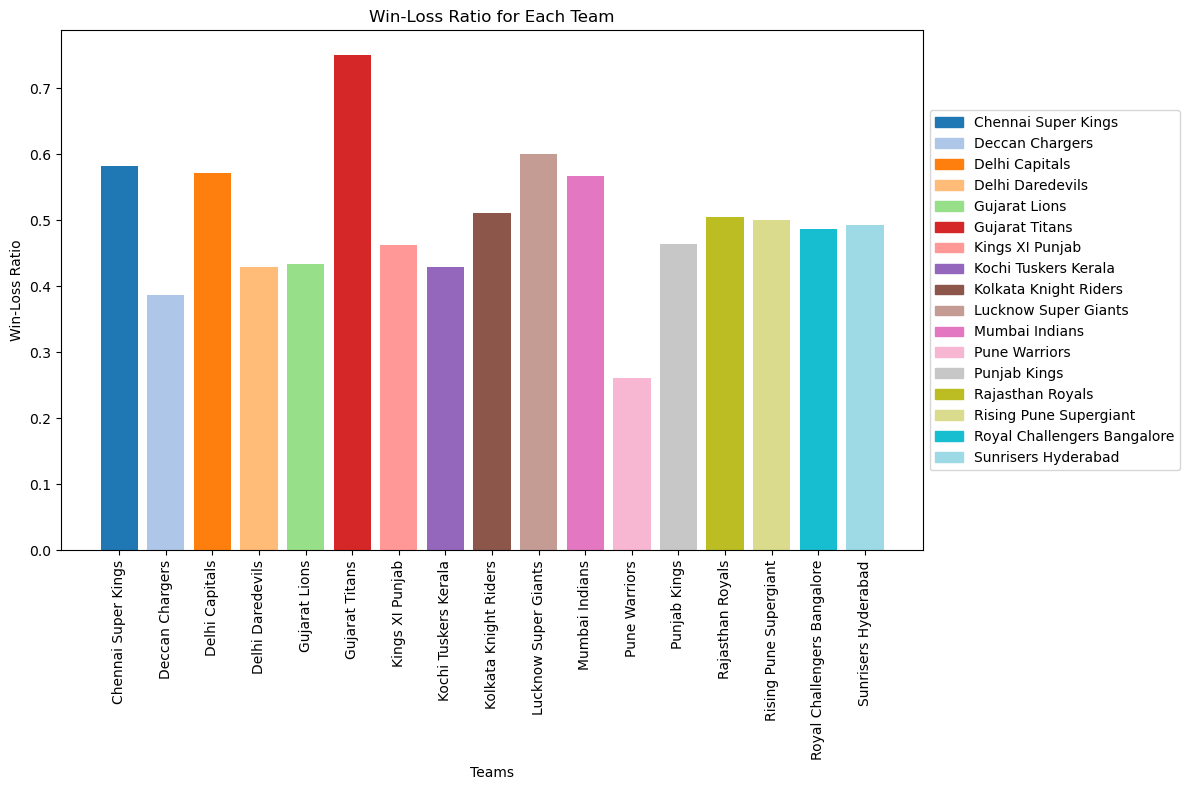

In [43]:
# plotting values
plt.figure(figsize=(12, 8))
bars = plt.bar(win_loss_ratio.index, win_loss_ratio.values, color=colors)
plt.xlabel('Teams')
plt.ylabel('Win-Loss Ratio')
plt.title('Win-Loss Ratio for Each Team')
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(num_teams)]
plt.legend(legend_labels, win_loss_ratio.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [44]:
# printing conclusion
conclusion_df = pd.DataFrame({'Team': win_loss_ratio.index, 'Win-Loss Ratio': win_loss_ratio.values})
conclusion_df = conclusion_df.sort_values(by='Win-Loss Ratio', ascending=False)
conclusion_df = conclusion_df.reset_index(drop=True)
conclusion_df

,Team,Win-Loss Ratio
0,Gujarat Titans,0.750000
1,Lucknow Super Giants,0.600000
2,Chennai Super Kings,0.581731
3,Delhi Capitals,0.571429
4,Mumbai Indians,0.567100
5,Kolkata Knight Riders,0.511211
6,Rajasthan Royals,0.505208
7,Rising Pune Supergiant,0.500000
8,Sunrisers Hyderabad,0.493421
9,Royal Challengers Bangalore,0.486726


### **7. Plotting the toss decision for each team that is what is percentage of choosing batting and bowling for that team**

In [45]:
# Calculating the percentage of times each team chooses batting or bowling
team_toss_data = df.groupby('TossWinner')['TossDecision'].value_counts(normalize=True).unstack() * 100

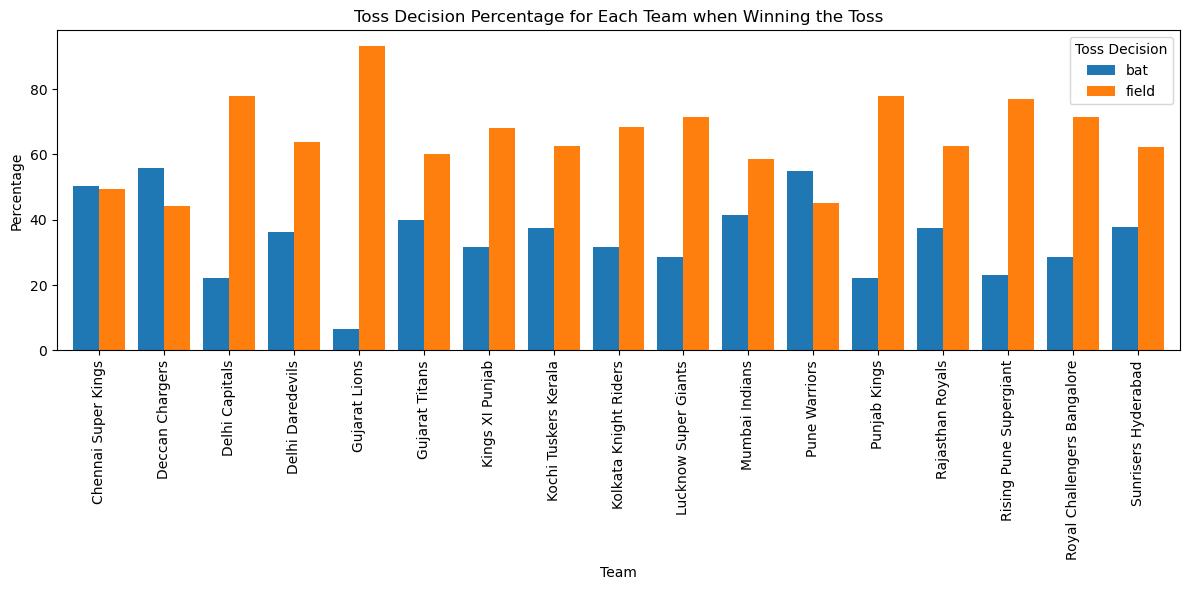

In [46]:
# Plotting the percentage for all teams
team_toss_data.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.title('Toss Decision Percentage for Each Team when Winning the Toss')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

In [47]:
# conclusion
team_toss_data = df.groupby('TossWinner')['TossDecision'].value_counts(normalize=True).unstack() * 100
conclusion_df = pd.DataFrame(team_toss_data)
print("Conclusion:")
conclusion_df

Conclusion:


TossDecision,bat,field
TossWinner,,
Chennai Super Kings,50.458716,49.541284
Deccan Chargers,55.813953,44.186047
Delhi Capitals,22.222222,77.777778
Delhi Daredevils,36.250000,63.750000
Gujarat Lions,6.666667,93.333333
Gujarat Titans,40.000000,60.000000
Kings XI Punjab,31.764706,68.235294
Kochi Tuskers Kerala,37.500000,62.500000
Kolkata Knight Riders,31.578947,68.421053


### **8. PLOTTING THE GRAPH FOR EACH TEAM I.E. WHAT IS THE PERCENTAGE OF WIN AND LOSS IF THEY WIN THE TOSS AND CHOOSE FIELD**

In [48]:
# Filtering the DataFrame for matches where the toss decision is fielding
fielding_df = df[df['TossDecision'] == 'field']

In [49]:
# Grouping the DataFrame by TossWinner and calculate the total number of matches won and lost for each team
team_stats = fielding_df.groupby('TossWinner')['WinningTeam'].value_counts().unstack(fill_value=0)

In [50]:
# Excluding 'Kochi Tuskers Kerala' from the DataFrame
if 'Kochi Tuskers Kerala' in team_stats.index:
    team_stats = team_stats.drop('Kochi Tuskers Kerala')

In [51]:
# Calculating win and loss percentages
team_stats['WinPercentage'] = team_stats.apply(lambda row: (row[row.name] / row.sum()) * 100, axis=1)
team_stats['LossPercentage'] = 100 - team_stats['WinPercentage']

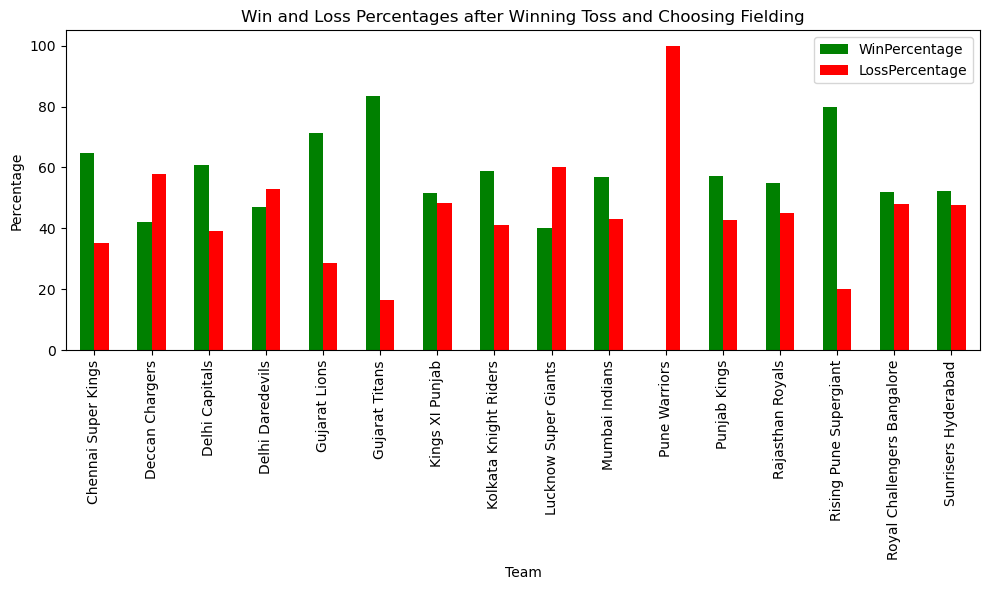

In [52]:
# Ploting the graph
fig, ax = plt.subplots(figsize=(10, 6))

team_stats[['WinPercentage', 'LossPercentage']].plot(kind='bar', ax=ax, color=['green', 'red'])
ax.set_xlabel('Team')
ax.set_ylabel('Percentage')
ax.set_title('Win and Loss Percentages after Winning Toss and Choosing Fielding')

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
team_stats[['WinPercentage', 'LossPercentage']]

WinningTeam,WinPercentage,LossPercentage
TossWinner,,
Chennai Super Kings,64.814815,35.185185
Deccan Chargers,42.105263,57.894737
Delhi Capitals,60.714286,39.285714
Delhi Daredevils,47.058824,52.941176
Gujarat Lions,71.428571,28.571429
Gujarat Titans,83.333333,16.666667
Kings XI Punjab,51.724138,48.275862
Kolkata Knight Riders,58.974359,41.025641
Lucknow Super Giants,40.000000,60.000000


### **8. PLOTTING THE GRAPH FOR EACH TEAM I.E. WHAT IS THE PERCENTAGE OF WIN AND LOSS IF THEY WIN THE TOSS AND CHOOSE BAT**

In [54]:
# Filtering the DataFrame for matches where the toss decision is batting
batting_df = df[df['TossDecision'] == 'bat']

In [55]:
# Grouping the DataFrame by TossWinner and calculate the total number of matches won and lost for each team
team_stats = batting_df.groupby('TossWinner')['WinningTeam'].value_counts().unstack(fill_value=0)

In [56]:
# Excluding 'Kochi Tuskers Kerala' from the DataFrame
if 'Kochi Tuskers Kerala' in team_stats.index:
    team_stats = team_stats.drop('Kochi Tuskers Kerala')

In [57]:
# Calculating win and loss percentages
team_stats['WinPercentage'] = team_stats.apply(lambda row: (row[row.name] / row.sum()) * 100, axis=1)
team_stats['LossPercentage'] = 100 - team_stats['WinPercentage']

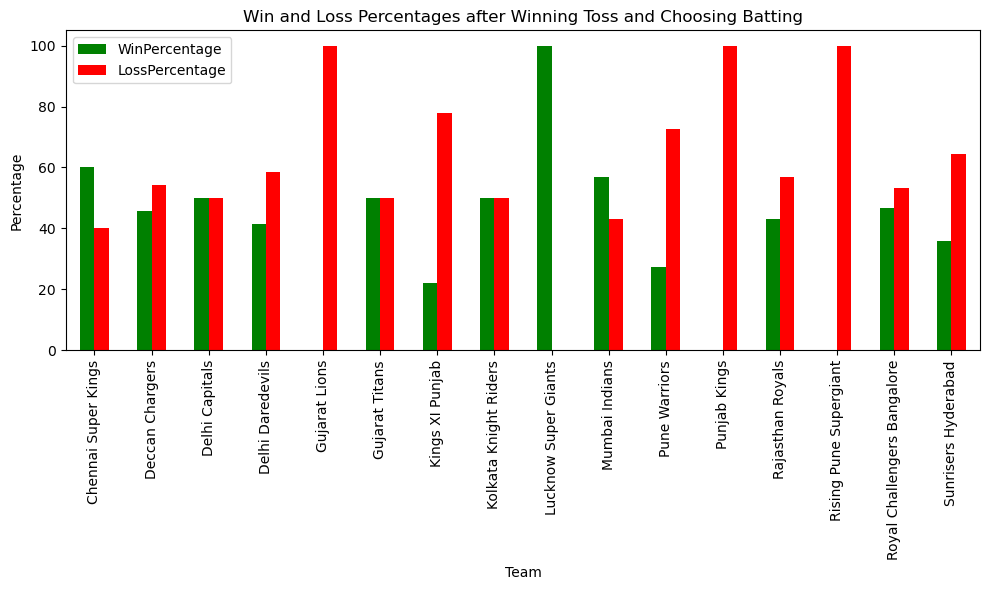

In [58]:
# Ploting the graph
fig, ax = plt.subplots(figsize=(10, 6))

team_stats[['WinPercentage', 'LossPercentage']].plot(kind='bar', ax=ax, color=['green', 'red'])
ax.set_xlabel('Team')
ax.set_ylabel('Percentage')
ax.set_title('Win and Loss Percentages after Winning Toss and Choosing Batting')

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
team_stats[['WinPercentage', 'LossPercentage']]

WinningTeam,WinPercentage,LossPercentage
TossWinner,,
Chennai Super Kings,60.000000,40.000000
Deccan Chargers,45.833333,54.166667
Delhi Capitals,50.000000,50.000000
Delhi Daredevils,41.379310,58.620690
Gujarat Lions,0.000000,100.000000
Gujarat Titans,50.000000,50.000000
Kings XI Punjab,22.222222,77.777778
Kolkata Knight Riders,50.000000,50.000000
Lucknow Super Giants,100.000000,0.000000


### **8. PLOTTING THE GRAPH FOR AVERAGE MARGIN OF VICTORY FOR EACH TEAM**

In [60]:
# Calculating the average margin of victory for each team
team_margin = df.groupby('Team1')['Margin'].mean().sort_values(ascending=False)

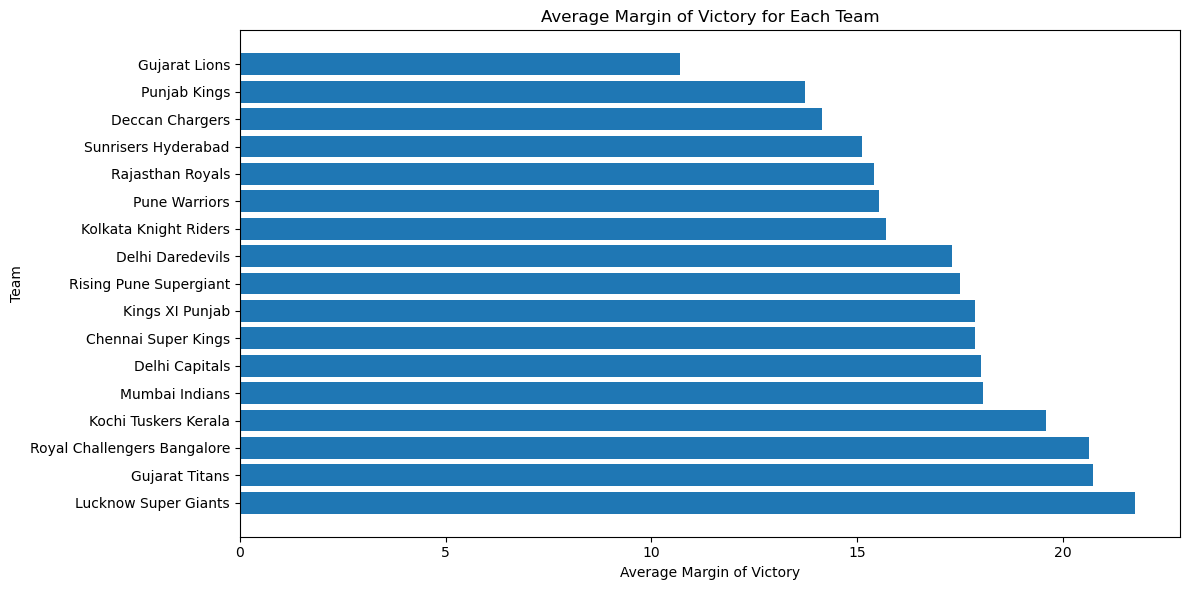

In [61]:
#  Plotting the average margin of victory
plt.figure(figsize=(12, 6))
plt.barh(team_margin.index, team_margin.values)
plt.xlabel('Average Margin of Victory')
plt.ylabel('Team')
plt.title('Average Margin of Victory for Each Team')
plt.tight_layout()
plt.show()

In [62]:
# conclusion
team_margin = df.groupby('Team1')['Margin'].mean().sort_values(ascending=False)
conclusion_df = pd.DataFrame({'Team': team_margin.index, 'Average Margin of Victory': team_margin.values})
conclusion_df

,Team,Average Margin of Victory
0,Lucknow Super Giants,21.750000
1,Gujarat Titans,20.714286
2,Royal Challengers Bangalore,20.634921
3,Kochi Tuskers Kerala,19.571429
4,Mumbai Indians,18.062500
5,Delhi Capitals,18.000000
6,Chennai Super Kings,17.864865
7,Kings XI Punjab,17.858696
8,Rising Pune Supergiant,17.500000
9,Delhi Daredevils,17.305882


### **9. PLOTTING THE PERFORMANCE OF THE TEAM OVER THE YEAR**

In [63]:
# Grouping the DataFrame by team and season, and count the number of matches played
team_performance = df.groupby(['Team1', 'Season']).size().reset_index(name='MatchesPlayed')

In [64]:
# Pivot the DataFrame to convert seasons into columns
team_performance_pivot = team_performance.pivot(index='Season', columns='Team1', values='MatchesPlayed')

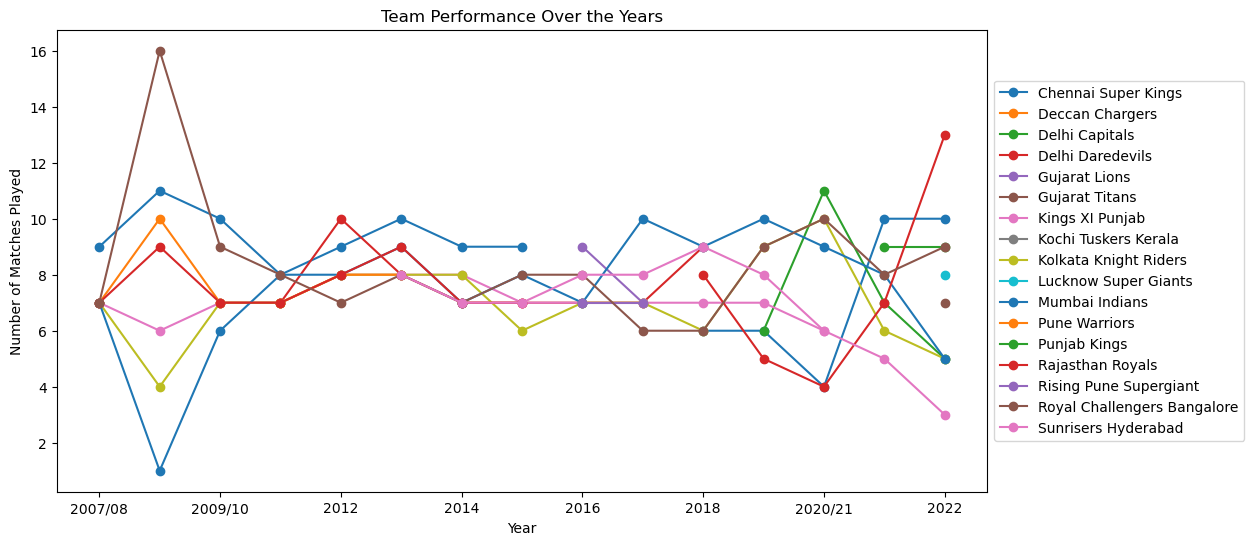

In [65]:
# Plotting the line chart
team_performance_pivot.plot.line(marker='o',figsize=(12, 6))
plt.title('Team Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches Played')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [66]:
# Calculating the total matches played by each team over the years
team_total_matches = team_performance_pivot.sum()

In [67]:
# Finding the team with the maximum and minimum matches played
team_with_most_matches = team_total_matches.idxmax()
team_with_least_matches = team_total_matches.idxmin()

In [68]:
# Finding the seasons with the maximum and minimum matches played
season_with_most_matches = team_performance_pivot[team_with_most_matches].idxmax()
season_with_least_matches = team_performance_pivot[team_with_least_matches].idxmin()

In [69]:
# Printing the conclusion
print("Team performance conclusion:")
print("===================================")
print("The team with the most matches played over the years is:", team_with_most_matches)
print("The team with the least matches played over the years is:", team_with_least_matches)
print("The season with the most matches played by", team_with_most_matches, "is:", season_with_most_matches)
print("The season with the least matches played by", team_with_least_matches, "is:", season_with_least_matches)

Team performance conclusion:
The team with the most matches played over the years is: Royal Challengers Bangalore
The team with the least matches played over the years is: Gujarat Titans
The season with the most matches played by Royal Challengers Bangalore is: 2009
The season with the least matches played by Gujarat Titans is: 2022


### 10. FINDING OUT THE TOP 10 AND BOTTOM 10 PLAYERS NAMES HAVING MAXIMUM AND MINIMUM PLAYER OF THE MATCH 

In [70]:
# Seting the column name for Player of the Match
player_of_match_column = 'Player_of_Match'

In [71]:
# Counting the number of times each player becomes the player of the match
player_counts = df[player_of_match_column].value_counts()

In [72]:
# Sorting the player counts in descending order
player_counts = player_counts.sort_values(ascending=False)

In [73]:
# Getting the top 10 players of the match with maximum counts
top_10_players_max = player_counts.head(10)

In [74]:
# Getting the top 10 players of the match with minimum counts
top_10_players_min = player_counts.tail(10)

In [75]:
# Generating a custom color palette with distinct colors for each player
num_players = len(player_counts)
color_palette = sns.color_palette('Set2', num_players)

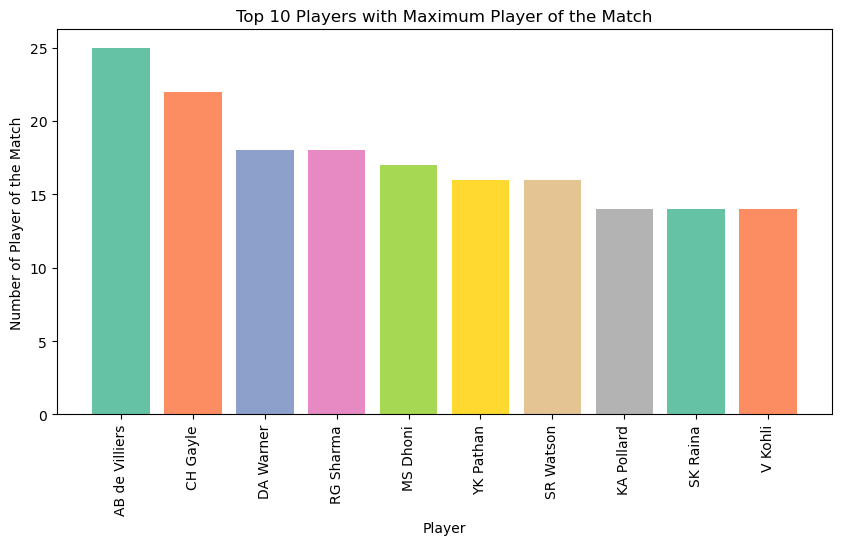

In [76]:
# Plotting the top 10 players with maximum counts as Player of the Match
plt.figure(figsize=(10, 5))
plt.bar(top_10_players_max.index, top_10_players_max.values, color=color_palette[:10])
plt.xlabel('Player')
plt.ylabel('Number of Player of the Match')
plt.title('Top 10 Players with Maximum Player of the Match')
plt.xticks(rotation=90)
plt.show()

In [77]:
# Creating the conclusion dataframe for top 10 players with maximum counts
top_10_max_conclusion_df = pd.DataFrame({'Player': top_10_players_max.index, 'Player_of_the_Match_Count': top_10_players_max.values})

In [78]:
# Printing the conclusion dataframe for top 10 players with maximum counts
top_10_max_conclusion_df

,Player,Player_of_the_Match_Count
0,AB de Villiers,25
1,CH Gayle,22
2,DA Warner,18
3,RG Sharma,18
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,16
7,KA Pollard,14
8,SK Raina,14
9,V Kohli,14


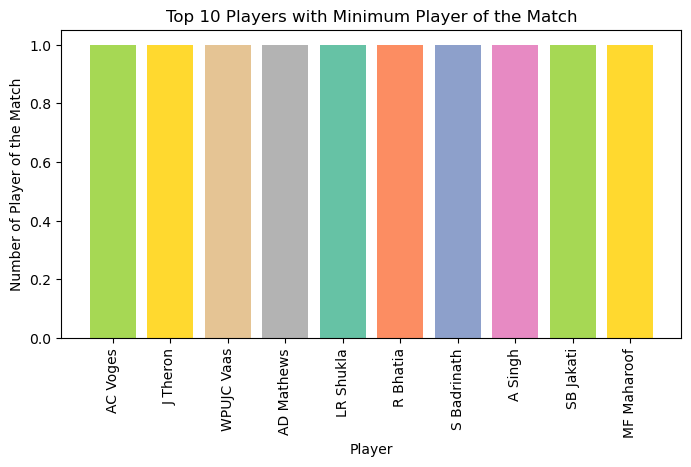

In [79]:
# Plotting the top 10 players with minimum counts as Player of the Match
plt.figure(figsize=(8, 4))
plt.bar(top_10_players_min.index, top_10_players_min.values, color=color_palette[-10:])
plt.xlabel('Player')
plt.ylabel('Number of Player of the Match')
plt.title('Top 10 Players with Minimum Player of the Match')
plt.xticks(rotation=90)
plt.show()

In [80]:
# Creating the conclusion dataframe for top 10 players with minimum counts
top_10_min_conclusion_df = pd.DataFrame({'Player': top_10_players_min.index, 'Player_of_the_Match_Count': top_10_players_min.values})

In [81]:
# Printing the conclusion dataframe for top 10 players with minimum counts
top_10_min_conclusion_df

,Player,Player_of_the_Match_Count
0,AC Voges,1
1,J Theron,1
2,WPUJC Vaas,1
3,AD Mathews,1
4,LR Shukla,1
5,R Bhatia,1
6,S Badrinath,1
7,A Singh,1
8,SB Jakati,1
9,MF Maharoof,1


### 11. FINDING OUT THE AVERAGE WINNING STREAK FOR EACH TEAM.

In [82]:
# Calculating average winning streak for each team
team_wins = df.groupby('WinningTeam').size()
team_losses = df.groupby('Team1').size() + df.groupby('Team2').size() - team_wins
average_streaks = team_wins / team_losses

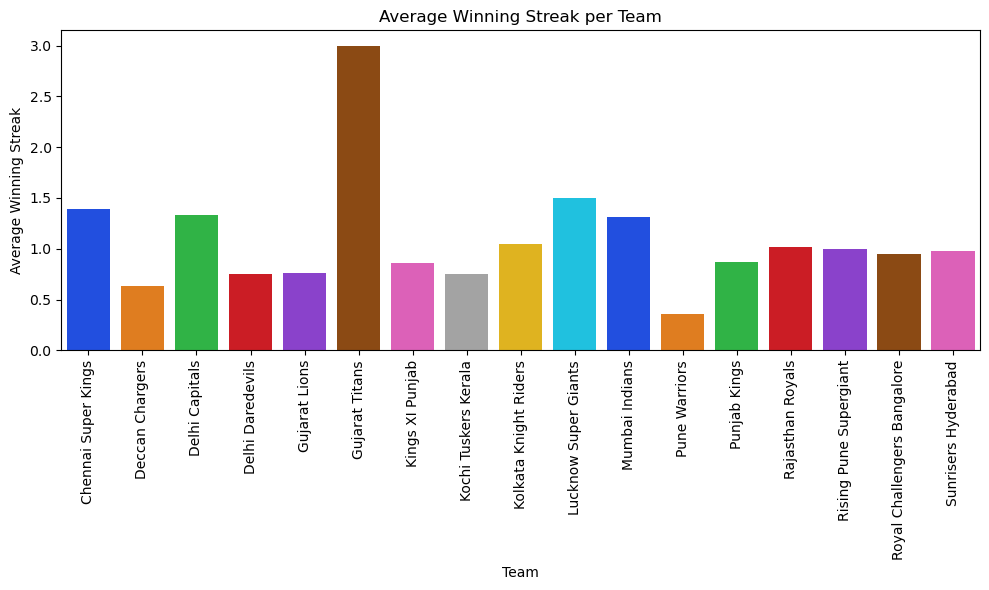

In [83]:
# Creating bar chart with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=average_streaks.index, y=average_streaks.values, palette='bright')
plt.xlabel('Team')
plt.ylabel('Average Winning Streak')
plt.title('Average Winning Streak per Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [84]:
# Creating a conclusion DataFrame
conclusion_df = pd.DataFrame({'Team': average_streaks.index, 'Average Winning Streak': average_streaks.values})

In [85]:
# Sorting the DataFrame by average winning streak in descending order
conclusion_df = conclusion_df.sort_values(by='Average Winning Streak', ascending=False)

In [86]:
# Reseting the index
conclusion_df = conclusion_df.reset_index(drop=True)

In [87]:
# Printing the conclusion DataFrame
conclusion_df

,Team,Average Winning Streak
0,Gujarat Titans,3.000000
1,Lucknow Super Giants,1.500000
2,Chennai Super Kings,1.390805
3,Delhi Capitals,1.333333
4,Mumbai Indians,1.310000
5,Kolkata Knight Riders,1.045872
6,Rajasthan Royals,1.021053
7,Rising Pune Supergiant,1.000000
8,Sunrisers Hyderabad,0.974026
9,Royal Challengers Bangalore,0.948276


### 12. AVERAGE MATCH WON BY THE PLAYER

In [88]:
# Grouping the data by player names and count the number of matches won
matches_won_per_player = df.groupby('Player_of_Match')['WinningTeam'].count()

In [89]:
# Calculating the average number of matches won per player
average_matches_won = matches_won_per_player.mean()

In [90]:
# Getting the top 40 players with the highest average number of matches won
top_10_players = matches_won_per_player.nlargest(40)

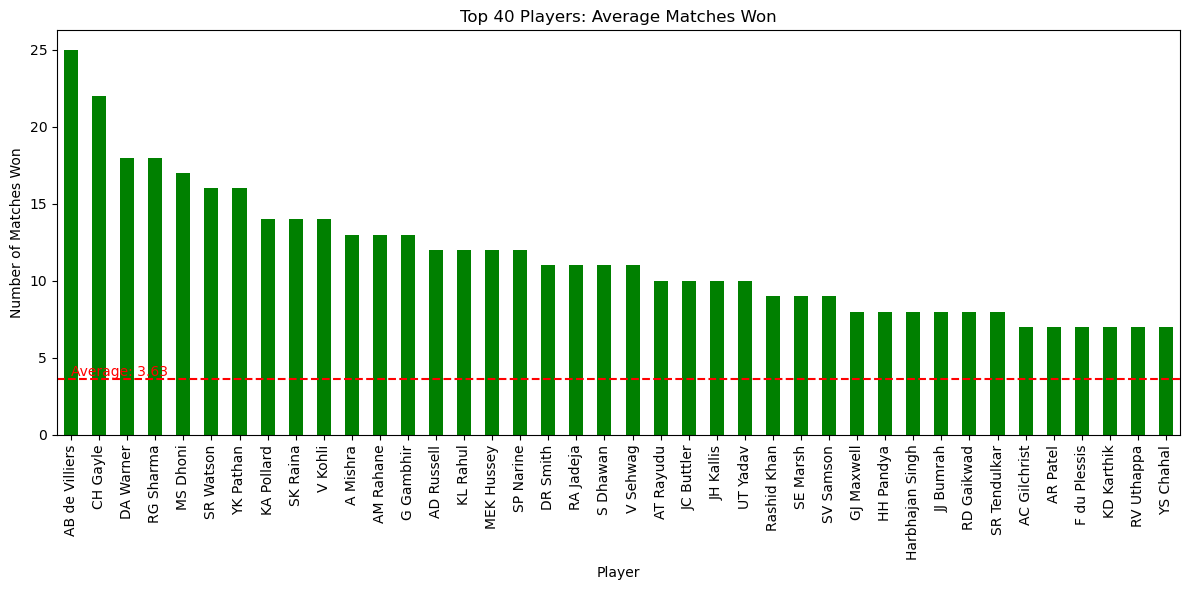

In [91]:
# Plotting the bar chart for the top 40 players
plt.figure(figsize=(12, 6))
top_10_players.plot(kind='bar',color = 'green')
plt.xlabel('Player')
plt.ylabel('Number of Matches Won')
plt.title('Top 40 Players: Average Matches Won')

# Adding a horizontal line for the average number of matches won
plt.axhline(average_matches_won, color='red', linestyle='--', label='Average')

# Adding labels for the average line
plt.text(0, average_matches_won + 0.2, f'Average: {average_matches_won:.2f}', color='red')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Showing the legend and plot the chart
plt.tight_layout()
plt.show()

### 13. DISTRIBUTION OF THE WINNING MARGIN

In [92]:
# Extracting the 'Margin' column from the DataFrame
winning_margins = df['Margin']

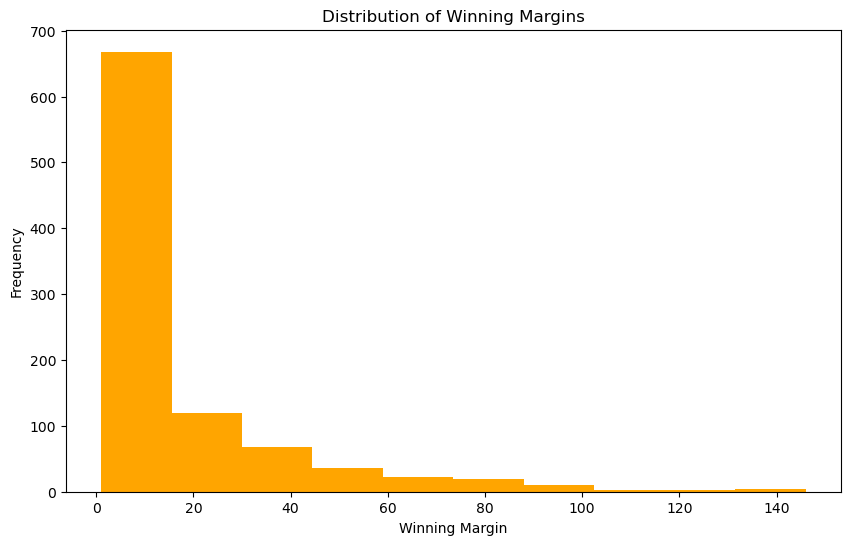

In [93]:
# Plotting a histogram of winning margins
plt.figure(figsize=(10, 6))
plt.hist(winning_margins, bins=10, color = 'orange')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Winning Margins')
plt.show()

### 14. PLOTTING A BOX ON DISTRIBUTION OF THE WINNING MARGIN

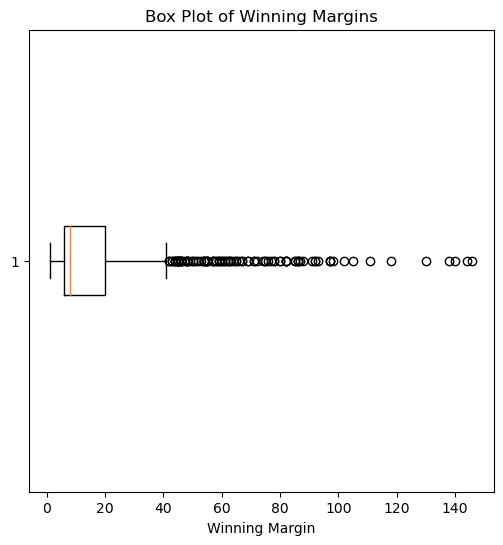

In [94]:
# Plotting a box plot of winning margins
plt.figure(figsize=(6, 6))
plt.boxplot(winning_margins, vert=False)
plt.xlabel('Winning Margin')
plt.title('Box Plot of Winning Margins')
plt.show()

In [95]:
print("Conclusions:")
print("1. The histogram provides insights into the frequency distribution of winning margins.")
print("   - A skewed histogram suggests a tendency for matches to be won by larger or smaller margins.")
print("   - An evenly distributed histogram indicates a relatively balanced distribution of winning margins.")
print("2. The box plot summarizes the distribution of winning margins and displays key statistical measures.")
print("   - The box represents the interquartile range (IQR) and shows the central 50% of winning margins.")
print("   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR.")
print("   - Outliers beyond the whiskers may indicate exceptional cases with unusually large or small winning margins.")
print("3. Analyzing the histogram and box plot together helps draw more comprehensive conclusions about the distribution of winning margins.")

Conclusions:
1. The histogram provides insights into the frequency distribution of winning margins.
   - A skewed histogram suggests a tendency for matches to be won by larger or smaller margins.
   - An evenly distributed histogram indicates a relatively balanced distribution of winning margins.
2. The box plot summarizes the distribution of winning margins and displays key statistical measures.
   - The box represents the interquartile range (IQR) and shows the central 50% of winning margins.
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR.
   - Outliers beyond the whiskers may indicate exceptional cases with unusually large or small winning margins.
3. Analyzing the histogram and box plot together helps draw more comprehensive conclusions about the distribution of winning margins.


### 14. FINDING OUT THE MOST COMMON UMPIRE 1 AND UMPIRE 2

In [96]:
# Counting the occurrences of each umpire as umpire 1
umpire1_counts = df['Umpire1'].value_counts()

In [97]:
# Counting the occurrences of each umpire as umpire 2
umpire2_counts = df['Umpire2'].value_counts()

In [98]:
# Determining the most common umpire 1
most_common_umpire1 = umpire1_counts.idxmax()

In [99]:
# Determining the most common umpire 2
most_common_umpire2 = umpire2_counts.idxmax()

In [100]:
# Printing the most common umpire 1 and umpire 2
print("The most common Umpire 1 is:", most_common_umpire1)
print("The most common Umpire 2 is:", most_common_umpire2)

The most common Umpire 1 is: AK Chaudhary
The most common Umpire 2 is: S Ravi


### 15. FINDING OUT THE POSSIBLITY OF MATCH THAT GOES IN A SUPEROVER

In [101]:
# Counting the occurrences of matches that went into a super over
super_over_count = df[df['SuperOver'] == 'Y'].shape[0]

In [102]:
# Calculating the total number of matches
total_matches = df.shape[0]

In [103]:
# Calculating the percentage of matches that went into a super over
percentage_super_over = (super_over_count / total_matches) * 100

In [104]:
# Printing the percentage of matches that went into a super over
print("Percentage of matches that went into a super over:", percentage_super_over)

Percentage of matches that went into a super over: 1.4736842105263157


### 16. FINDING OUT TOTAL NUMBER OF MATCHES PLAYED IN SEASON

In [105]:
# Counting the number of matches played in each season
matches_per_season = df['Season'].value_counts().sort_index()

In [106]:
# Generating a random color for each bar
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(6)]) for _ in range(len(matches_per_season))]

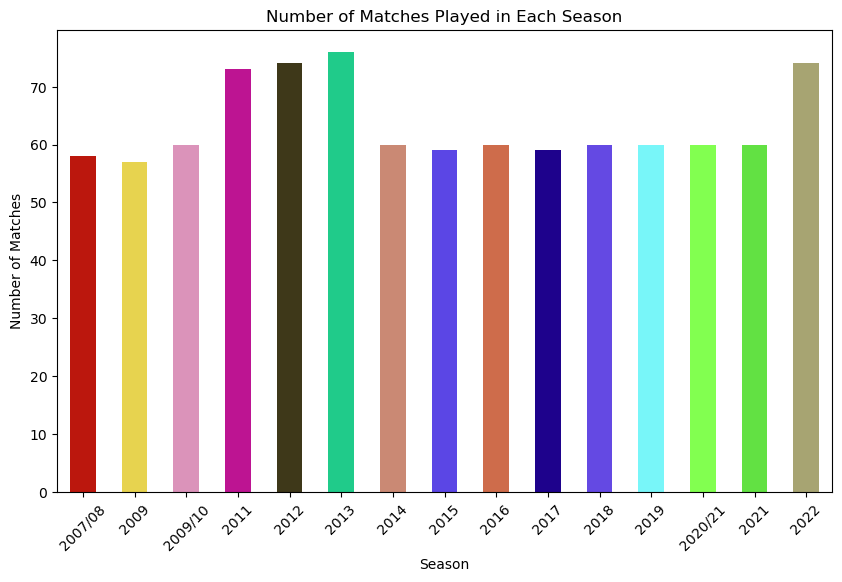

In [107]:
# Creating a bar plot with random colors for each bar
plt.figure(figsize=(10, 6))
matches_per_season.plot(kind='bar', color=colors)
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played in Each Season')
plt.xticks(rotation=45)
plt.show()

### 17. FINDING OUT WHICH TEAM WIN MAXIMUM NUMBER OF MATCHES

In [108]:
# Concatenating the 'Team1' and 'Team2' columns to get all participating teams
all_teams = pd.concat([df['Team1'], df['Team2']])

In [109]:
# Counting the occurrences of each team
team_counts = all_teams.value_counts()

In [110]:
# Getting the teams with the maximum count
teams_with_most_matches = team_counts[team_counts == team_counts.max()]

In [111]:
# Printing the teams that participated in the most number of matches
print("Teams with the most number of matches:")
teams_with_most_matches

Teams with the most number of matches:


Mumbai Indians    231
dtype: int64

# IPL SENTIMENTAL ANALYSIS

**CONVERTING CSV FILE IPL_2022_tweets into python dataframe(df)**

In [112]:
df = pd.read_csv(r'C:\Users\golut\OneDrive\Desktop\Datasets\IPL_2022_tweets.csv',low_memory=False)

**OVERVIEW OF DATAFRAME**

In [113]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457,6,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502,2675,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574659,Rohit Sharma FC,NaN,Hii This is an Die Heart Fan Club of Rohit Sharma,2021-08-02 04:05:06,3.0,11.0,219.0,False,2022-01-06 13:05:44,2⃣5⃣ Matches 🏏\n1⃣4⃣2⃣0⃣ Runs 🔥\n2⃣ Centuries ...,"['Mumbaiindians', 'OneFamily', 'CricketMeriJaa...",Twitter for Android,False
574660,Sanket Pandey,India,Proud to be an indian\n-Jay hind.\n-Vande matr...,2017-01-11 13:44:24,14.0,333.0,3844.0,False,2022-01-06 13:04:34,Tough competition 💪😂\n\n.\n#IPL #BCCI #IPL2022...,"['IPL', 'BCCI', 'IPL2022', 'twitter']",Twitter Web App,False
574661,InsideSport,"New Delhi, India",Official website of InsideSport - India's prem...,2017-01-21 11:03:22,5654.0,759.0,7723.0,False,2022-01-06 12:59:46,Lucknow IPL franchise ropes in MyCircle11 as t...,"['IPL2022', 'LucknowIPLTeam', 'IPL']",Twitter Web App,False
574662,Deepanshu Speaks,India,Offical Twitter handle of YouTube channel #Dee...,2021-06-17 14:44:22,11.0,42.0,1479.0,False,2022-01-06 12:52:12,Official conformation : RPSG's Lucknow IPL Tea...,"['TeamLucknow', 'IPL2022']",Twitter for Android,False


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574664 entries, 0 to 574663
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         574664 non-null  object 
 1   user_location     384107 non-null  object 
 2   user_description  492538 non-null  object 
 3   user_created      574655 non-null  object 
 4   user_followers    574649 non-null  float64
 5   user_friends      574649 non-null  object 
 6   user_favourites   574649 non-null  object 
 7   user_verified     574649 non-null  object 
 8   date              574649 non-null  object 
 9   text              574649 non-null  object 
 10  hashtags          574620 non-null  object 
 11  source            574640 non-null  object 
 12  is_retweet        574640 non-null  object 
dtypes: float64(1), object(12)
memory usage: 57.0+ MB


In [115]:
df.isnull()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574659,False,True,False,False,False,False,False,False,False,False,False,False,False
574660,False,False,False,False,False,False,False,False,False,False,False,False,False
574661,False,False,False,False,False,False,False,False,False,False,False,False,False
574662,False,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
df.shape

(574664, 13)

In [117]:
df.isnull().sum()

user_name                0
user_location       190557
user_description     82126
user_created             9
user_followers          15
user_friends            15
user_favourites         15
user_verified           15
date                    15
text                    15
hashtags                44
source                  24
is_retweet              24
dtype: int64

**DATA CLEANING**

**REMOVING NULL VALUES FROM DF**

In [118]:
df.dropna(inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348220 entries, 0 to 574663
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         348220 non-null  object 
 1   user_location     348220 non-null  object 
 2   user_description  348220 non-null  object 
 3   user_created      348220 non-null  object 
 4   user_followers    348220 non-null  float64
 5   user_friends      348220 non-null  object 
 6   user_favourites   348220 non-null  object 
 7   user_verified     348220 non-null  object 
 8   date              348220 non-null  object 
 9   text              348220 non-null  object 
 10  hashtags          348220 non-null  object 
 11  source            348220 non-null  object 
 12  is_retweet        348220 non-null  object 
dtypes: float64(1), object(12)
memory usage: 37.2+ MB


In [120]:
df.shape

(348220, 13)

In [121]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

**VISUALISING THE DATASET**

### 18. FINDING OF THE DISTRIBUTION OF TWEETS BY USER LOCATION 

In [122]:
# Removing ",India" from user_location column
df['user_location'] = df['user_location'].str.replace(', India', '')

In [123]:
# Counting the number of tweets from each modified user location
location_counts = df['user_location'].value_counts().head(10)  # Adjusting the number (e.g., head(10)) based on your preference

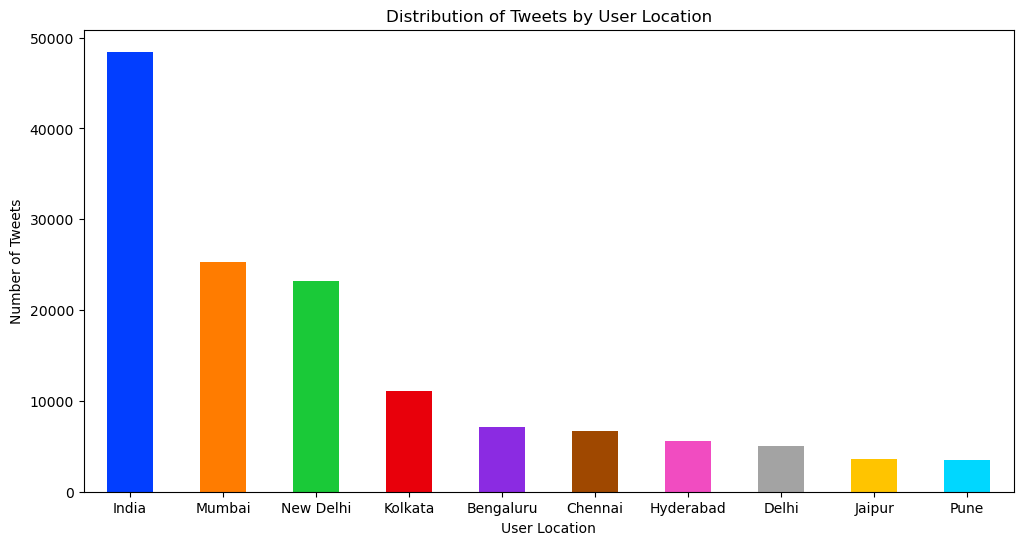

In [124]:
# Set a dark color palette
colors = sns.color_palette('bright')

# Plotting the graph
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color=colors, align='center')
plt.title('Distribution of Tweets by User Location')
plt.xlabel('User Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [125]:
# Getting the most common user location
most_common_location = location_counts.index[0]

In [126]:
# Calculating the total number of tweets
total_tweets = df.shape[0]

In [127]:
# Calculating the percentage of tweets from the most common location
percentage_most_common = (location_counts[0] / total_tweets) * 100

In [128]:
# Generating the conclusion
conclusion = f"The most common user location for tweeting is {most_common_location}, accounting for {percentage_most_common:.2f}% of the total tweets."

In [129]:
# Printing the conclusion
print(conclusion)

The most common user location for tweeting is India, accounting for 13.91% of the total tweets.


### 19. FINDING OUT THE NATURE OF TWEETS

In [130]:
# Performing sentiment analysis on each tweet
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [131]:
# Categorizing sentiments
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [132]:
# Calculating the percentage of positive, negative, and neutral tweets
sentiment_counts = df['sentiment_category'].value_counts(normalize=True) * 100

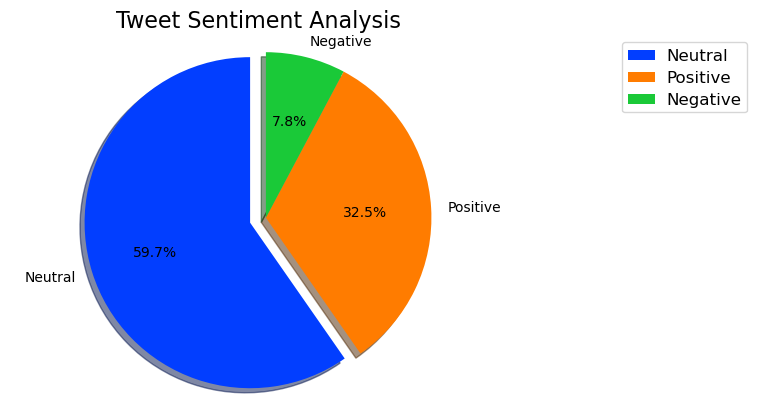

In [133]:
colors = sns.color_palette('bright', len(sentiment_counts))

# Creating a pie chart with 90-degree start angle and custom color palette
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=(0.1, 0, 0), colors=colors)

# Adding a title and legend
plt.title('Tweet Sentiment Analysis', fontsize=16)
plt.legend(sentiment_counts.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

# Making the plot a perfect circle
plt.axis('equal')

# Increasing font size of labels and percentages
plt.setp(plt.gca().get_xticklabels(), fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)

# Show the plot
plt.show()

In [134]:
# Print the sentiment analysis results
print("Sentiment Analysis Results:")
print("----------------------------")
print(f"Positive Tweets: {sentiment_counts['Positive']:.2f}%")
print(f"Negative Tweets: {sentiment_counts['Negative']:.2f}%")
print(f"Neutral Tweets: {sentiment_counts['Neutral']:.2f}%")

Sentiment Analysis Results:
----------------------------
Positive Tweets: 32.54%
Negative Tweets: 7.78%
Neutral Tweets: 59.68%


### 20. FINDING OUT THE MOST USED HASHTAGS FOR IPL2022

In [135]:
# Spliting hashtags into individual tags
df['hashtags'] = df['hashtags'].str.lower().str.split()

In [136]:
# Flatting the list of hashtags
all_hashtags = [tag for tags in df['hashtags'] for tag in tags]

In [137]:
# Creating a frequency count of hashtags
hashtag_counts = pd.Series(all_hashtags).value_counts().head(10)

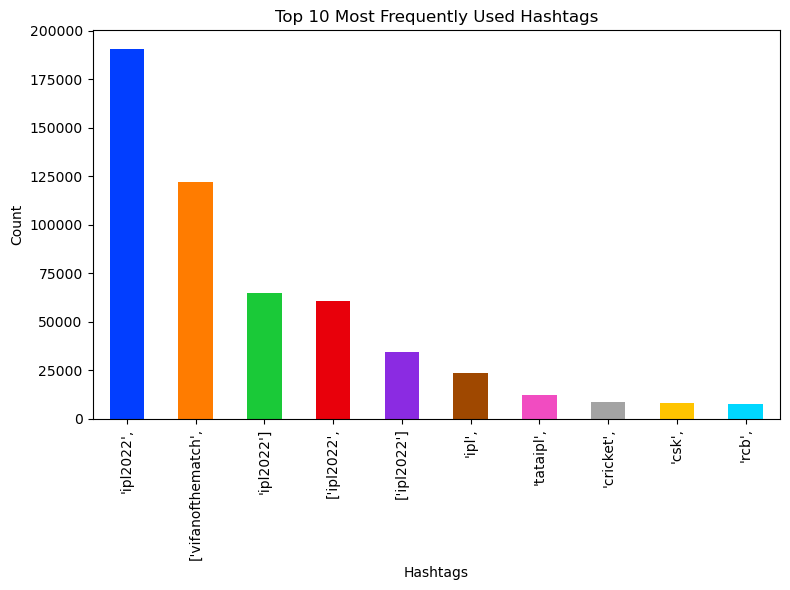

In [138]:
# Plotting the graph
plt.figure(figsize=(8, 6))
colors = sns.color_palette('bright')
hashtag_counts.plot(kind='bar', color=colors)
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Most Frequently Used Hashtags')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [139]:
# Finding out the conclusion
conclusion_df = pd.DataFrame({'Hashtags': hashtag_counts.index, 'Count': hashtag_counts.values})
conclusion_df

,Hashtags,Count
0,"'ipl2022',",190575
1,"['vifanofthematch',",122172
2,'ipl2022'],64603
3,"['ipl2022',",60660
4,['ipl2022'],34101
5,"'ipl',",23739
6,"'tataipl',",12388
7,"'cricket',",8792
8,"'csk',",7946
9,"'rcb',",7769


### 21. FINDING OUT THE SOURCE OF TWEETS.

In [140]:
# Create a frequency count of tweet sources
source_counts = df['source'].value_counts().head(10)

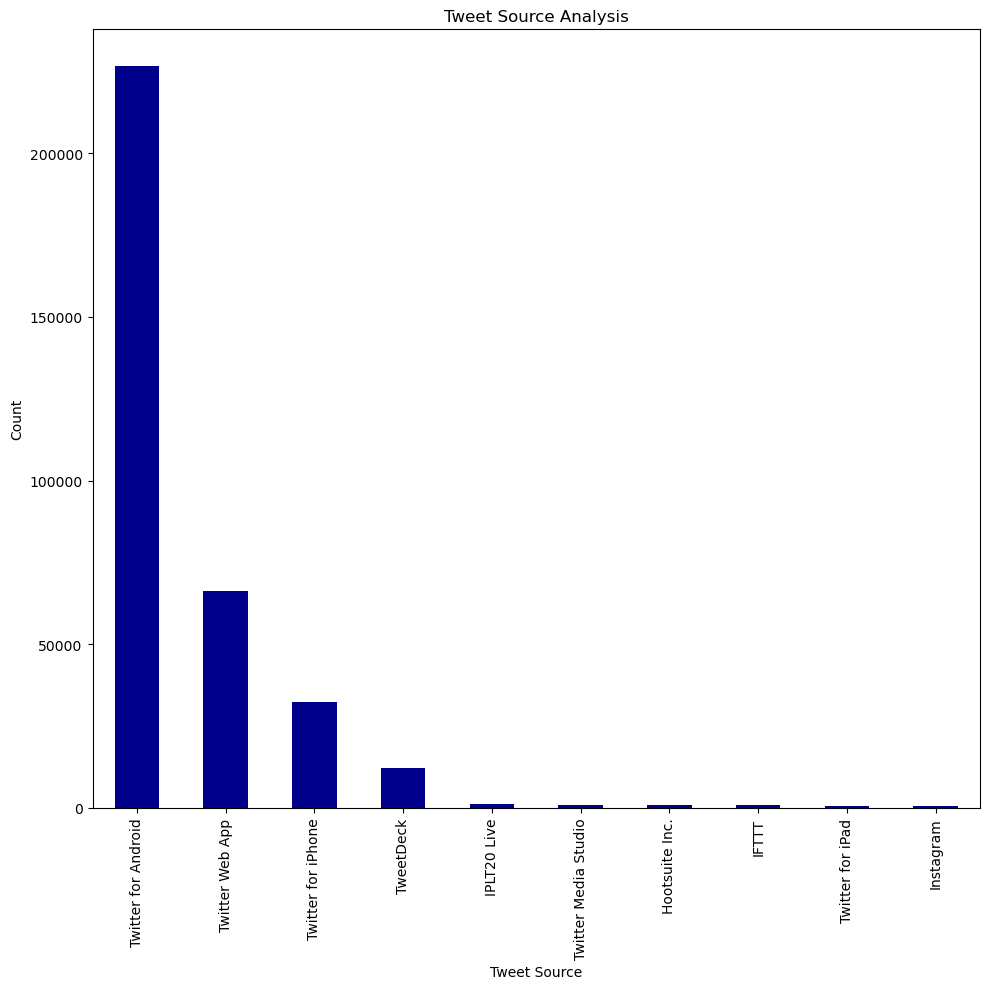

In [141]:
# Plotting the graph
plt.figure(figsize=(10, 10))
source_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.title('Tweet Source Analysis')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [142]:
# Creating a conclusion DataFrame
conclusion_df = pd.DataFrame({'Tweet Source': source_counts.index, 'Count': source_counts.values})

# Printing the conclusion DataFrame
print("Tweet Source Analysis:")
conclusion_df

Tweet Source Analysis:


,Tweet Source,Count
0,Twitter for Android,226512
1,Twitter Web App,66231
2,Twitter for iPhone,32412
3,TweetDeck,12358
4,IPLT20 Live,1178
5,Twitter Media Studio,1047
6,Hootsuite Inc.,935
7,IFTTT,854
8,Twitter for iPad,621
9,Instagram,607


### 22. FINDING OUT THE NUMBER OF TWEETS PER HOUR

In [143]:
# Converting 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [144]:
# Extracting hour and day of the week
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

In [145]:
# Calculating tweet count by hour
hourly_tweet_counts = df['hour'].value_counts().sort_index()

In [146]:
# Calculating tweet count by day of the week
daily_tweet_counts = df['day_of_week'].value_counts()

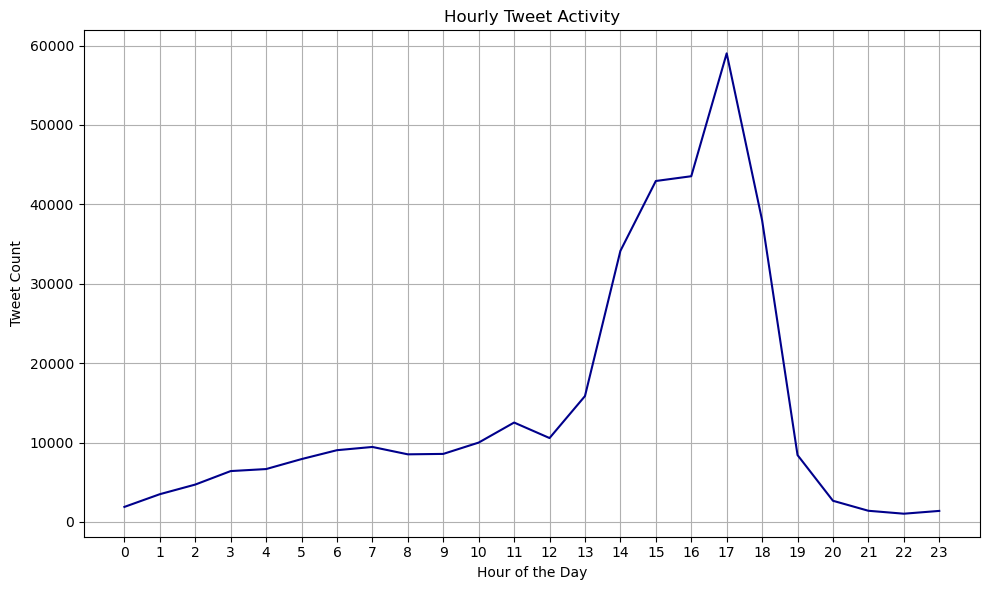

In [147]:
# Plotting the hourly tweet activity
plt.figure(figsize=(10, 6))
hourly_tweet_counts.plot(kind='line', color='darkblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.title('Hourly Tweet Activity')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [148]:
# Calculating tweet count by hour
hourly_tweet_counts = df['hour'].value_counts().sort_index()

# Creating the conclusion DataFrame
hourly_conclusion_df = pd.DataFrame({'Hour of the Day': hourly_tweet_counts.index, 'Tweet Count': hourly_tweet_counts.values})

# Printing the conclusion DataFrame
print("Hourly Tweet Activity:")
hourly_conclusion_df

Hourly Tweet Activity:


,Hour of the Day,Tweet Count
0,0,1898
1,1,3499
2,2,4711
3,3,6411
4,4,6665
5,5,7921
6,6,9041
7,7,9449
8,8,8520
9,9,8573


In [149]:
# Printing the conclusion DataFrame for daily tweet activity
daily_conclusion_df = pd.DataFrame({'Day of the Week': daily_tweet_counts.index, 'Tweet Count': daily_tweet_counts.values})
print("Daily Tweet Activity:")
daily_conclusion_df

Daily Tweet Activity:


,Day of the Week,Tweet Count
0,Wednesday,57463
1,Thursday,57197
2,Saturday,56212
3,Friday,53708
4,Tuesday,45878
5,Monday,40483
6,Sunday,37279


### 23. FINDING OUT THAT USER IS VERIFIED OR NOT

In [150]:
# Calculating the proportion of verified users
verified_users = df['user_verified'].value_counts(normalize=True) * 100

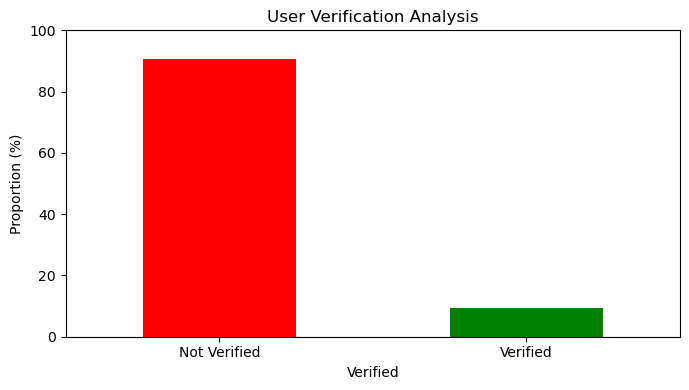

In [151]:
# Plotting the analysis
plt.figure(figsize=(7, 4))
verified_users.plot(kind='bar', color=['red', 'green'])
plt.title('User Verification Analysis')
plt.xlabel('Verified')
plt.ylabel('Proportion (%)')
plt.xticks([0, 1], ['Not Verified', 'Verified'], rotation=0)
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

In [152]:
# Creating the conclusion DataFrame
conclusion_df = pd.DataFrame({'Verification Status': verified_users.index, 'Proportion (%)': verified_users.values})

# Printing the conclusion DataFrame
print("User Verification Analysis:")
conclusion_df

User Verification Analysis:


,Verification Status,Proportion (%)
0,False,90.56516
1,True,9.43484


### 24. FINDING OUT THAT WHICH TWEET IS RETWEET OR NOT. 

In [153]:
# Calculating the percentage of retweets
retweet_percentage = (df['is_retweet'].sum() / len(df)) * 100

In [154]:
# Calculating the percentage of original tweets
original_tweet_percentage = 100 - retweet_percentage

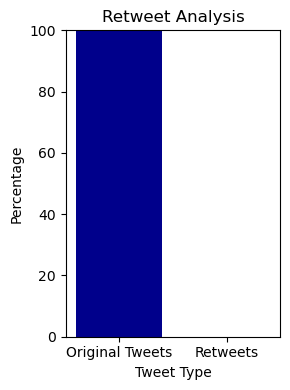

In [155]:
# Plotting the analysis
plt.figure(figsize=(3, 4))
plt.bar(['Original Tweets', 'Retweets'], [original_tweet_percentage, retweet_percentage], color=['darkblue', 'gray'])
plt.title('Retweet Analysis')
plt.xlabel('Tweet Type')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

In [156]:
# Creating the conclusion DataFrame
conclusion_df = pd.DataFrame({'Tweet Type': ['Original Tweets', 'Retweets'],
                              'Percentage': [original_tweet_percentage, retweet_percentage]})

In [157]:
# Printing the conclusion DataFrame
print("Retweet Analysis:")
conclusion_df

Retweet Analysis:


,Tweet Type,Percentage
0,Original Tweets,100.0
1,Retweets,0.0


### 25. PLOTTING AVERAGE SENTIMENT SCORE BY SENTIMENT

In [158]:
# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [159]:
# Applying sentiment analysis on each text in the DataFrame and store the sentiment scores in a new column:
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [160]:
# Classify the sentiment based on the sentiment score and store it in a new column:
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [161]:
# Calculating average sentiment score by sentiment
average_sentiment = df.groupby('sentiment')['sentiment_score'].mean()

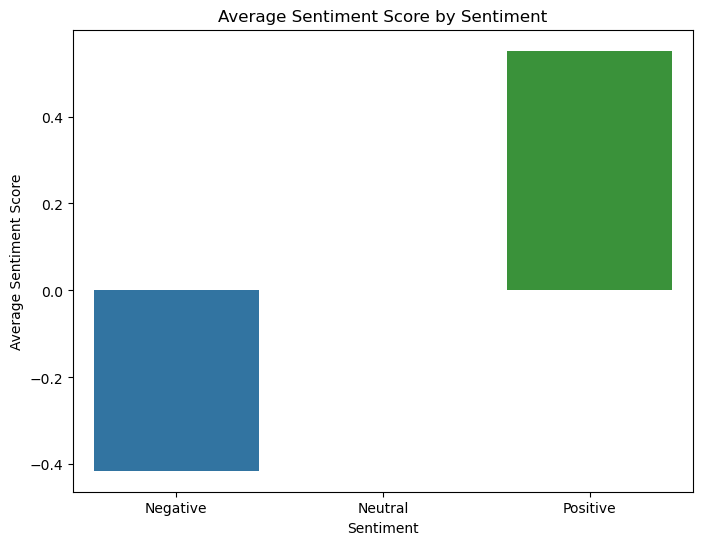

In [162]:
# Ploting average sentiment score by sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=average_sentiment.index, y=average_sentiment.values)
plt.xlabel('Sentiment')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Sentiment')
plt.show()

### 26. PLOTTING SENTIMENT SCORE DISTRIBUTION

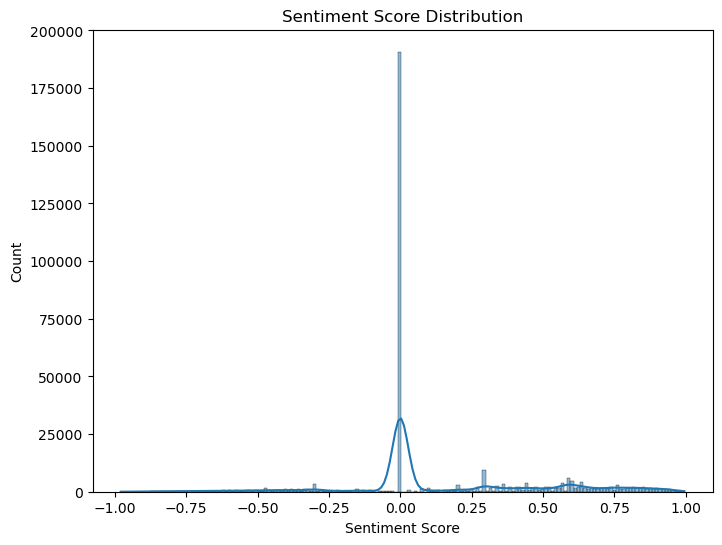

In [163]:
# Ploting sentiment score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Score Distribution')
plt.show()

### 27. PLOTTING THE GRAPH FOR SENTIMENT DISTRIBUTION BY SOURCE

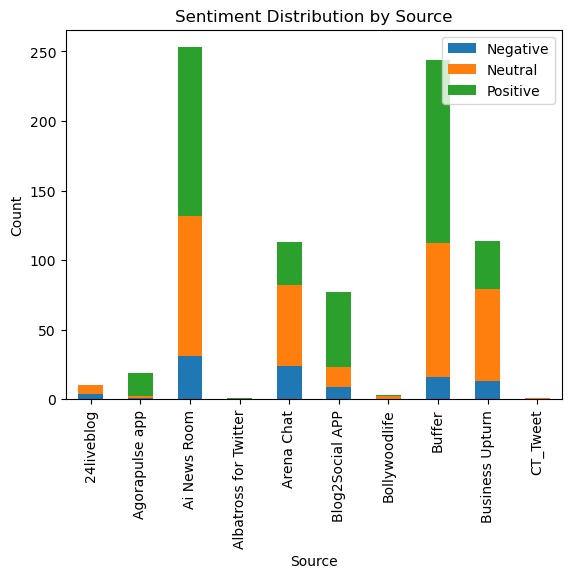

In [164]:
sentiment_by_source = df.groupby('source')['sentiment'].value_counts().unstack().head(10)
sentiment_by_source.plot(kind='bar', stacked=True)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Source')
plt.legend(loc='upper right')
plt.show()

 ### 28. SENTIMENT DISTRIBUTION BY USER FOLLOWERS

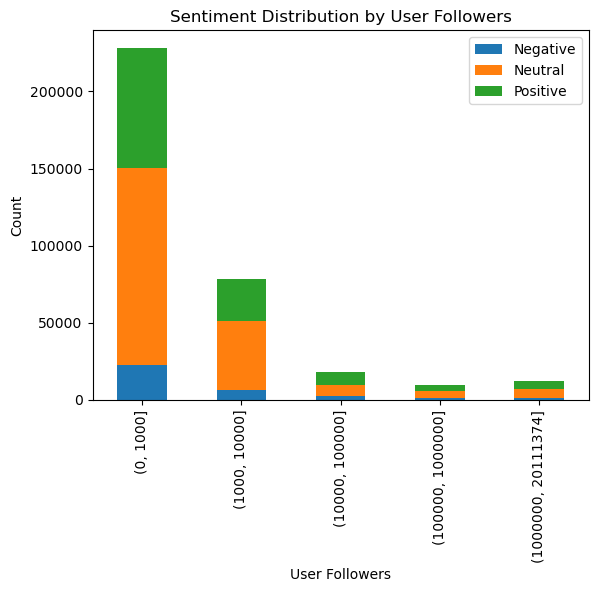

In [165]:
df['user_followers'] = df['user_followers'].astype(int)
df['followers_bin'] = pd.cut(df['user_followers'], bins=[0, 1000, 10000, 100000, 1000000, df['user_followers'].max()])
sentiment_by_followers = df.groupby('followers_bin')['sentiment'].value_counts().unstack()
sentiment_by_followers.plot(kind='bar', stacked=True)
plt.xlabel('User Followers')
plt.ylabel('Count')
plt.title('Sentiment Distribution by User Followers')
plt.legend(loc='upper right')
plt.show()

### 29. PLOTTING CLOUD OF HASHTAGS

In [166]:
# Seting the maximum number of hashtags to be plotted
max_hashtags = 100

In [167]:
# Filtering and select hashtags randomly
filtered_hashtags = random.sample(df['hashtags'].explode().dropna().tolist(), max_hashtags)

In [168]:
# Concatenating the selected hashtags into a single string
hashtags_data = ' '.join(filtered_hashtags)

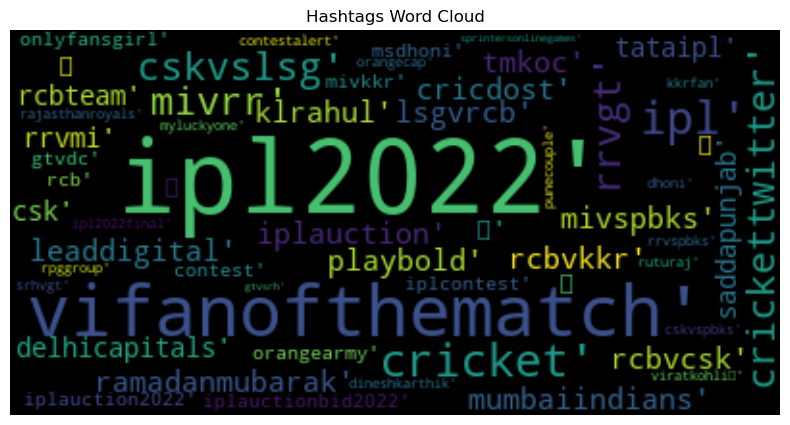

In [169]:
# Generateing the word cloud
wordcloud = WordCloud(background_color='black').generate(hashtags_data)

# Ploting the word cloud with a black background
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtags Word Cloud')
plt.show()

### 30. PLOTTING THE CLOUD OF COMMENTS

In [170]:
# Concatenating all text data into a single string
text_data = ' '.join(df['text'].dropna().tolist())

In [171]:
# Generating the word cloud
wordcloud = WordCloud(background_color='black').generate(text_data)

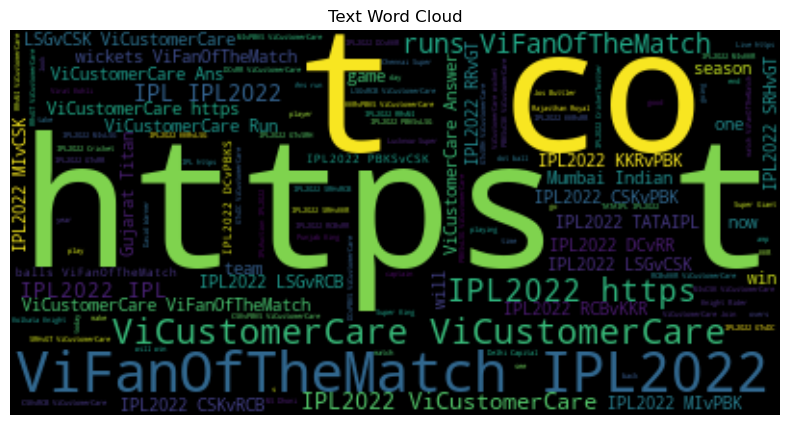

In [172]:
# Ploting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Text Word Cloud')
plt.show()